<h1 align=center><font size = 5>Project - Data Mining</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  [Problem 1: Clustering](#problem1)
    
    
    A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

    
> [1.1 Read the data, initial steps, and exploratory data analysis 
(Univariate, Bi-variate, and multivariate analysis).](#section1.1)

> [1.2  Is scaling necessary for clustering in this case? Justify](#section1.2)

> [1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters.](#section1.3)

> [1.4 Apply K-Means clustering. Elbow curve and silhouette score. Inferences on the finalized clusters.](#section1.4)

> [1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.](#section1.5)
        

2.  [Problem 2: CART-RF-ANN](#problem2)
    
    
    An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

    
> [2.1 Read the data, initial steps, and exploratory data analysis 
(Univariate, Bi-variate, and multivariate analysis).).](#section2.1)

> [2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network](#section2.2)

> [2.3 Performance Metrics: Performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.](#section2.3)

> [2.4 Final Model: Compare all the models and write an inference which model is best/optimized.](#section2.4)

> [2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations](#section2.5)

In [1]:
import pandas as pd #pandas for dataframe
import numpy as np #numpy
import seaborn as sns #visualisation 
sns.set_style("whitegrid")
import matplotlib.pyplot as plt #visualisation 
import plotly as ply #visualisation 
from scipy import stats #statistical analysis
import matplotlib as mp #visualisation
%matplotlib inline
from sklearn.preprocessing import StandardScaler #Scaling of data

#hierarchical
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering

#kmeans
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#GridSearchCV for selecting best params
from sklearn.model_selection import GridSearchCV

from PIL import Image # converting images into arrays

from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forests
from sklearn.neural_network import MLPClassifier #Artificial Neural Networks

#Model evaluation
from sklearn.metrics import classification_report #classification reports
from sklearn.metrics import roc_auc_score,roc_curve #ROC and AUC curves
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

print('Libraries Imported.')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Libraries Imported.


## 1. Problem 1: Clustering<a class="anchor" id="problem1"></a>

__Business Problem__

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

__1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).__<a class="anchor" id="section1.1"></a>

Data Dictionary for customer Segmentation:

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)
<br />
---
_**Importing the data set for customer segmentation**_

In [2]:
market = pd.read_csv('bank_marketing_part1_Data.csv')
print("Data imported successfully!")
market.head()

Data imported successfully!


spending  advance_payments  probability_of_full_payment  current_balance  \
0    19.940            16.920                        0.875            6.675   
1    15.990            14.890                        0.906            5.363   
2    18.950            16.420                        0.883            6.248   
3    10.830            12.960                        0.810            5.278   
4    17.990            15.860                        0.899            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

In [3]:
market_kmeans = market.copy()

_**Performing initial steps to check the usability of the dataset**_

In [4]:
def initial_steps(df):
                            ### structure of the data
    print(color.RED+color.BOLD+"Structure of the dataset:"+color.END)
    print('-'*100)
    print()
    print("The dataset has {} rows and {} columns.\n\nTotal elements in this dataset are {}".format(df.shape[0],df.shape[1],df.size))
    print()
                        ### missing values check
    print(color.RED+color.BOLD+"Missing Values Check"+color.END)
    print('-'*100)
    if df.isnull().sum().any() == True:
        print("There are {} missing values in the dataset! Need further checks!".format(df.isnull().sum().sum()))
    else:
        print("There are no missing values in the dataset")
    print()
                            #### Info
    print(color.RED+color.BOLD+"Info of the dataset"+color.END)
    print('-'*100)
    print(df.info())
    print()
                    ### Duplicate
    print(color.RED+color.BOLD+"Duplicate Values Check"+color.END)
    print('-'*100)
    dups = df.duplicated()
    print('Number of duplicate rows = %d' % (dups.sum()))
    return df[dups].iloc[:10,:]
    print()
    
    
initial_steps(df=market)

Structure of the dataset:
----------------------------------------------------------------------------------------------------

The dataset has 210 rows and 7 columns.

Total elements in this dataset are 1470

Missing Values Check
----------------------------------------------------------------------------------------------------
There are no missing values in the dataset

Info of the dataset
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-nu

Empty DataFrame
Columns: [spending, advance_payments, probability_of_full_payment, current_balance, credit_limit, min_payment_amt, max_spent_in_single_shopping]
Index: []

__Inferences__

---
_The market dataset has 210 rows and 7 columns all of them with float64 dtypes. The data at glance looks clean with no missing/duplicate values._

_The memory usage is 11.6 KB._
<br/>
---
_**Performing Univariate Analysis**_

_First let's divide the columns into numerical and categorical._

In [5]:
numerical = market.describe().columns.to_list()
categorical = [] #market.describe(exclude=np.number).columns.to_list()


def stats_summary(df):
    if len(numerical) == 0:
        print("This data set has no numerical values! Perform statistical analysis for categorical values only.")
        return df.describe(exclude=np.number)
    elif len(categorical) == 0:
        print("This data set has no categorical values! Perform statistical analysis for numerical values only.")
        return df.describe()
    else:
        print("This dataset has {} numerical values and {} categorical values! Perform statistical analysis for both!".format(len(numerical),len(categorical)))
        return df.describe()
        return df.describe(exclude=np.number)
    
     

stats_summary(df=market)

This data set has no categorical values! Perform statistical analysis for numerical values only.


spending  advance_payments  probability_of_full_payment  \
count   210.000           210.000                      210.000   
mean     14.848            14.559                        0.871   
std       2.910             1.306                        0.024   
min      10.590            12.410                        0.808   
25%      12.270            13.450                        0.857   
50%      14.355            14.320                        0.873   
75%      17.305            15.715                        0.888   
max      21.180            17.250                        0.918   

       current_balance  credit_limit  min_payment_amt  \
count          210.000       210.000          210.000   
mean             5.629         3.259            3.700   
std              0.443         0.378            1.504   
min              4.899         2.630            0.765   
25%              5.262         2.944            2.561   
50%              5.524         3.237            3.599   
75%              5.980         3.562            4.769   
max              6.675         4.033            8.456   

       max_spent_in_single_shopping  
count                       210.000  
mean                          5.408  
std                           0.491  
min                           4.519  
25%                           5.045  
50%                           5.223  
75%                           5.877  
max                           6.550

_The data only have numerical/float values. We can assume that the data are well spread around the mean. Standard deviation tells you how spread out the data is. It is a measure of how far each observed value is from the mean. In any distribution, about 95% of values will be within 2 standard deviations of the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. Let's further analysis the spread_

In [6]:
#Univariate Analysis
def uni_num(df,num_col):
    for i in df[num_col]:
        print(color.RED+color.BOLD+"Univariate Analysis for column: {}".format(i)+color.END)
        print('-'*100)
        print(color.BOLD+"Statistical Inferences"+color.END)
        print('-'*60)
        print(df[i].describe())
        print()
        print(color.BOLD+"Shapiro-Wilk test for normality"+color.END)
        print('-'*60)
        shapiro = stats.shapiro(df[i])
                    #If the p-value is less than 0.05, we reject the null hypothesis that there's 
                    #no difference between the means and conclude that a significant difference does exist. 
                    #If the p-value is larger than 0.05, we cannot conclude that a significant difference exists.
        if shapiro.pvalue < 0.05:
            print("pvalue for {} column is {},\nHence we reject the null hypothesis that the data is normally distributed".format(i,round(shapiro.pvalue,4)))
        else:
            print("pvalue for {} column is {}, The data is normally distributed".format(i,round(shapiro.pvalue,4)))
        print()
#         plt.figure(figsize=[15,5])
#         sns.distplot(df[i],hist=False,kde_kws={"shade":True,"color": "r","linewidth":1},fit=stats.norm)
#         plt.show()
        print()
        print(color.BOLD+"Detecting outliers using z-score"+color.END)
        print('-'*60)
        
        z = np.abs(stats.zscore(df[i]))
    
        if (z>3).any() == True or (z<-3).any() == True:
            print(i,'variable has outliers')
        else:
            print(i,'variable does not have any outliers')
            
        print()
        
#         plt.figure(figsize=[15,5])
#         sns.boxplot(data=df,x=i)
#         plt.show()  

        
uni_num(df=market,num_col=numerical)

Univariate Analysis for column: spending
----------------------------------------------------------------------------------------------------
Statistical Inferences
------------------------------------------------------------
count   210.000
mean     14.848
std       2.910
min      10.590
25%      12.270
50%      14.355
75%      17.305
max      21.180
Name: spending, dtype: float64

Shapiro-Wilk test for normality
------------------------------------------------------------
pvalue for spending column is 0.0,
Hence we reject the null hypothesis that the data is normally distributed


Detecting outliers using z-score
------------------------------------------------------------
spending variable does not have any outliers

Univariate Analysis for column: advance_payments
----------------------------------------------------------------------------------------------------
Statistical Inferences
------------------------------------------------------------
count   210.000
mean     14.559
std 

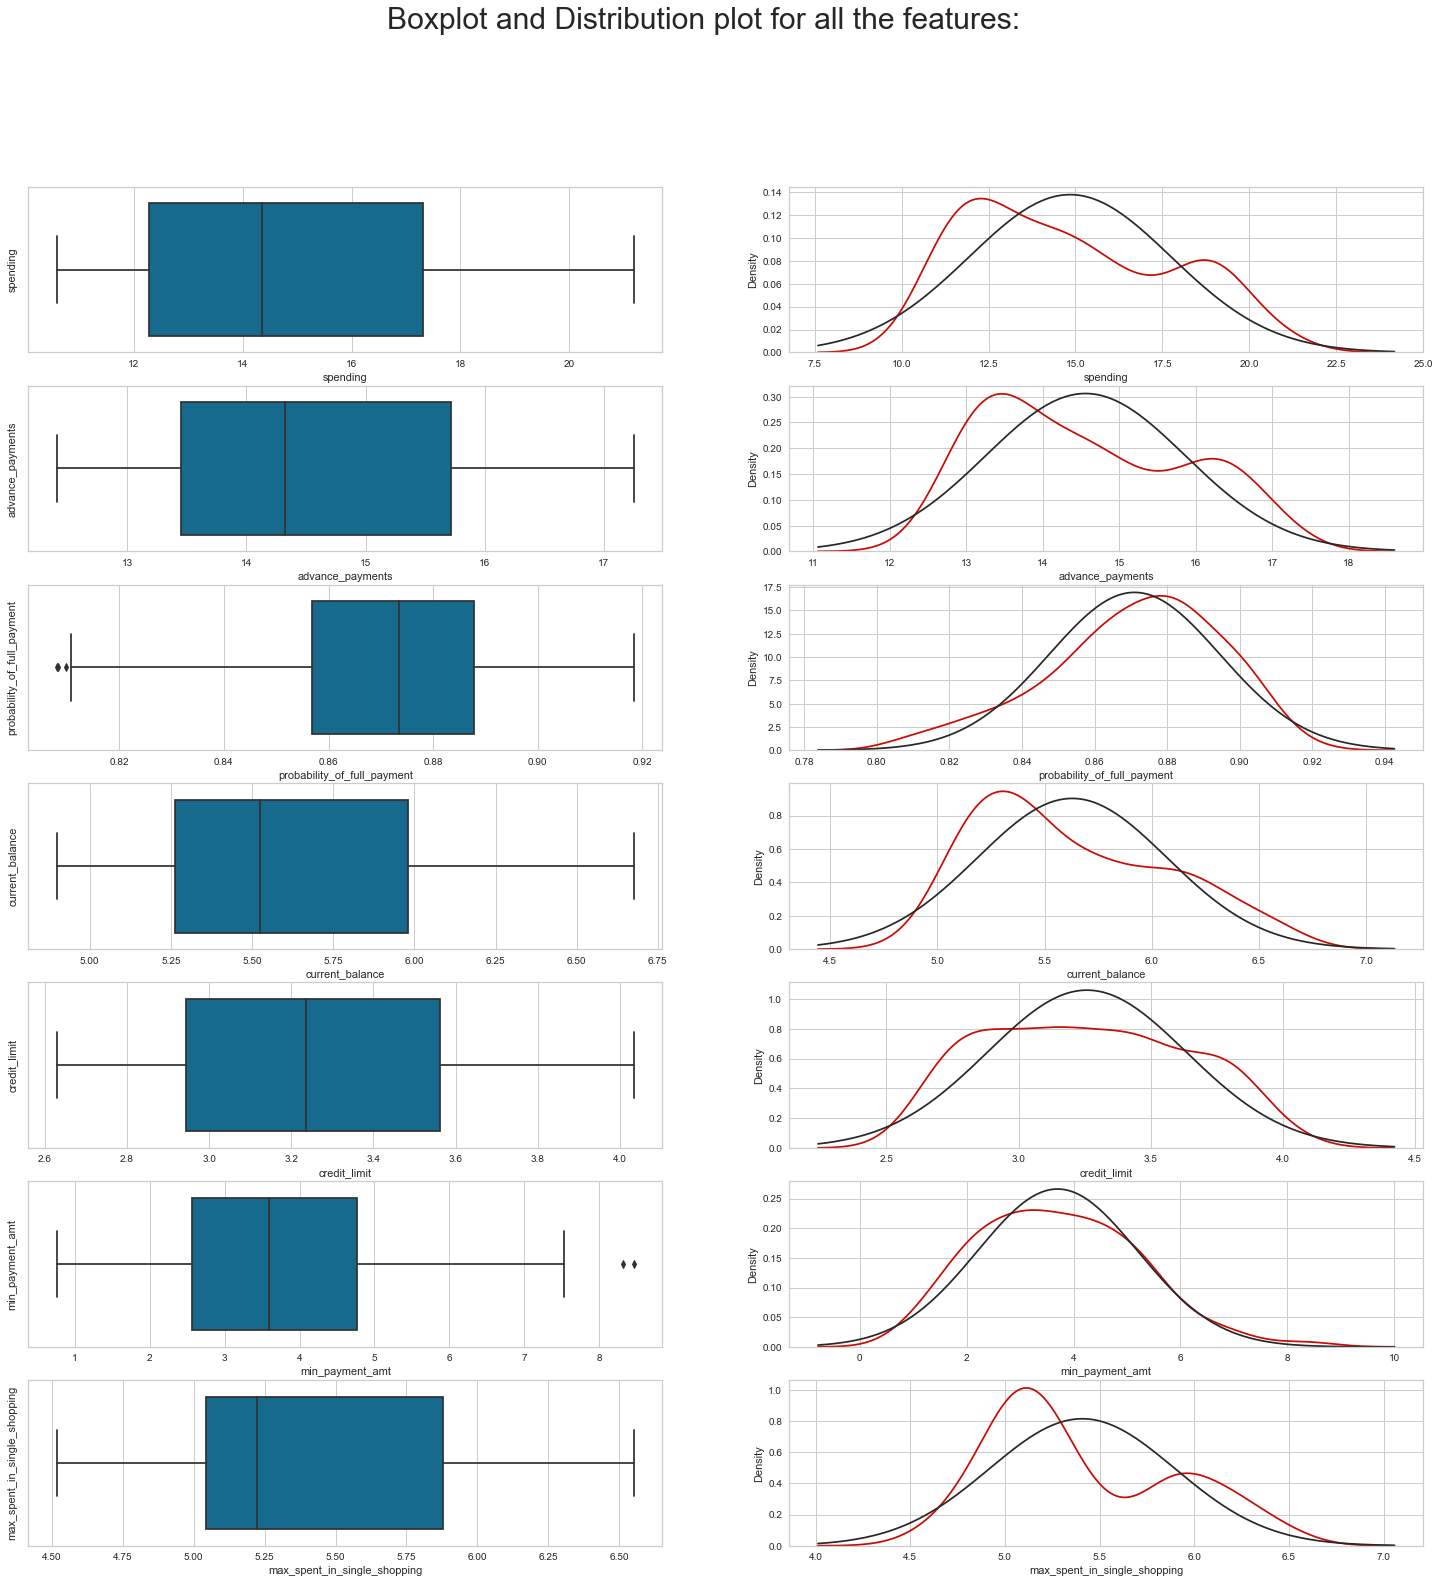

In [7]:
fig,axes = plt.subplots(7,2,figsize=[25,25])
spending_box = sns.boxplot(market['spending'],ax=axes[0,0])
spending_hist = sns.distplot(market['spending'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[0,1])
spending_box.set_ylabel('spending')

advance_payments_box = sns.boxplot(market['advance_payments'],ax=axes[1,0])
advance_payments_hist = sns.distplot(market['advance_payments'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[1,1])
advance_payments_box.set_ylabel('advance_payments')

probability_of_full_payment_box = sns.boxplot(market['probability_of_full_payment'],ax=axes[2,0])
probability_of_full_payment_hist = sns.distplot(market['probability_of_full_payment'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[2,1])
probability_of_full_payment_box.set_ylabel('probability_of_full_payment')

current_balance_box = sns.boxplot(market['current_balance'],ax=axes[3,0])
current_balance_hist = sns.distplot(market['current_balance'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[3,1])
current_balance_box.set_ylabel('current_balance')

credit_limit_box = sns.boxplot(market['credit_limit'],ax=axes[4,0])
credit_limit_hist = sns.distplot(market['credit_limit'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[4,1])
credit_limit_box.set_ylabel('credit_limit')

min_payment_amt_box = sns.boxplot(market['min_payment_amt'],ax=axes[5,0])
min_payment_amt_hist = sns.distplot(market['min_payment_amt'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[5,1])
min_payment_amt_box.set_ylabel('min_payment_amt')

max_spent_in_single_shopping_box = sns.boxplot(market['max_spent_in_single_shopping'],ax=axes[6,0])
max_spent_in_single_shopping_hist = sns.distplot(market['max_spent_in_single_shopping'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[6,1])
max_spent_in_single_shopping_box.set_ylabel('max_spent_in_single_shopping')
plt.suptitle('Boxplot and Distribution plot for all the features:',fontsize=30)
plt.show()

__Inference__

---

_**Shapiro Wilkins Test for normallity** calculates whether a random sample comes from (specifically) a normal distribution. Based on this test we concluded that the data is not normally distributed._

<span align=center>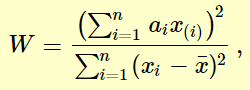</span>

<!-- _**Interquartile Range to check for outliers** is the range between the first and the third quartiles namely Q1 and Q3:<br/><h5 align=center> IQR = Q3 – Q1.</h5> <br/>The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers. Based on this check we concluded that the columns do not have any outliers._
 -->
_**Z-score check for outliers**_
<br/><h5 align=center>Z score = (x -mean) / std. deviation</h5> <br/>

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

_**Performing Bivariate Analysis**_

Relationship between variables


<Figure size 1080x1080 with 0 Axes>

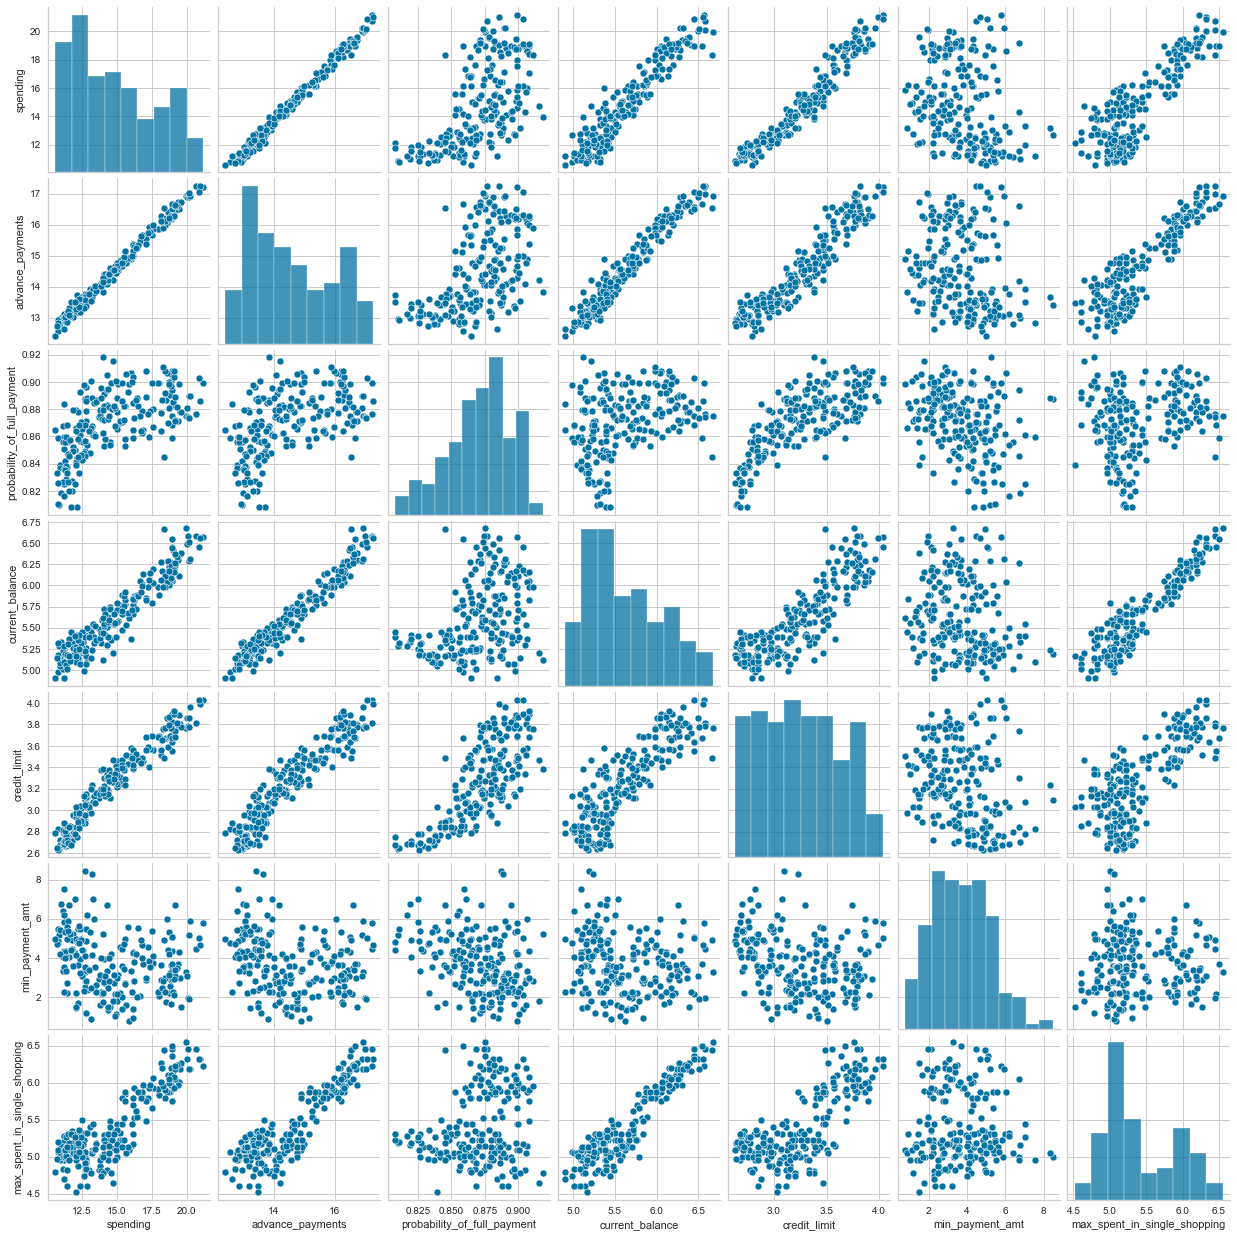

In [8]:
def bi_num(df,num_col):
    plt.figure(figsize=[15,15])
    sns.pairplot(data=df)
#     plt.title("Relationship between variables")
    plt.show()
print(color.BOLD+'Relationship between variables'+color.END)
bi_num(df=market,num_col=market.columns)

__Inference__

---
_The data is positively correlated with each other except for `min_payment_amt` which negatively correlated with rest of the columns. Negative or inverse correlation describes when two variables tend to move in opposite size and direction from one another, such that when one increases the other decreases._

_**Performing Multivariate Analysis**_

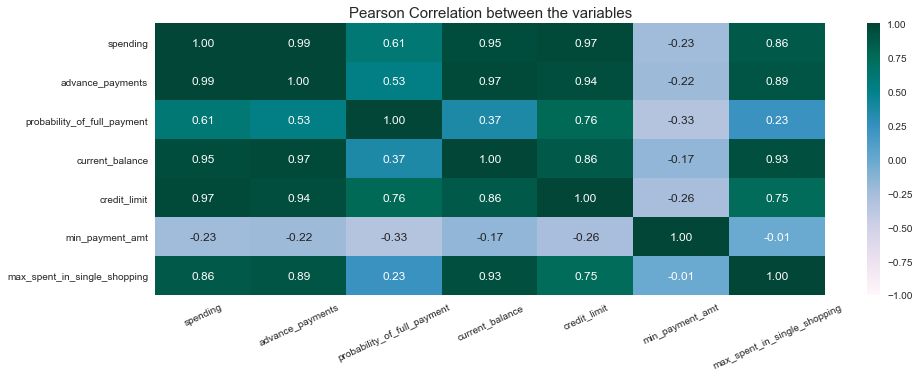

In [9]:
plt.figure(figsize=[15,5])
sns.heatmap(market.corr(),annot=True,fmt='.2f',cmap='PuBuGn',center=0,vmin=-1,vmax=1)
plt.xticks(rotation=25)
plt.title("Pearson Correlation between the variables",fontsize=15)
plt.show()


__Inference__

---
_`spending`, `advance_payments`,`probability_of_full_payment`,`current_balance`, `credit_limit` and `max_spent_in_single_shopping` are positively correlated to each other. `min_payment_amt` is the only column that is negatively correlated to the rest of them. All the postively correlated columns have the correlation closer to 1 which means that there is a strong relation between all these variables. `min_payment_amt` and `max_spent_in_single_shopping` has correlation of -0.01 which is closer to zero, this concludes that there is no correlation between these variables. `min_payment_amt` has negative correlation with rest of the variables which means if the other variables increases the `min_payment_amt` decreases._

__1.2  Do you think scaling is necessary for clustering in this case? Justify__<a class="anchor" id="section1.2"></a>

_A scaling transformation alters size of an object. In the scaling process, we either compress or expand the dimension of the object. In this case some of the variables are in 100s and others are in 1000s which means that at some point the variables with higher scale will dominate while calculating distances. For example, the Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally._

In [10]:
market_scaled = market.copy() 

In [11]:
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(market)
market_scaled = pd.DataFrame(scaled_df, index=market_scaled.index, columns=market_scaled.columns)
market_scaled.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     1.754             1.812                        0.178            2.368   
1     0.394             0.254                        1.502           -0.601   
2     1.413             1.428                        0.505            1.401   
3    -1.384            -1.228                       -2.592           -0.793   
4     1.083             0.998                        1.196            0.592   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         1.339           -0.299                         2.329  
1         0.858           -0.243                        -0.539  
2         1.317           -0.221                         1.509  
3        -1.639            0.988                        -0.455  
4         1.155           -1.088                         0.875

__1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them__<a class="anchor" id="section1.3"></a>

_**Let's check dendogram based on different linkage methods**_

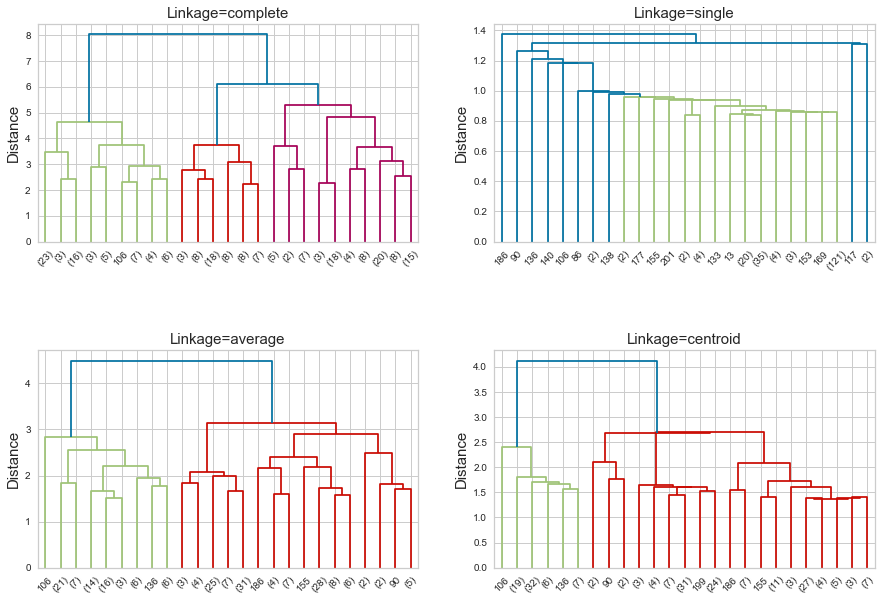

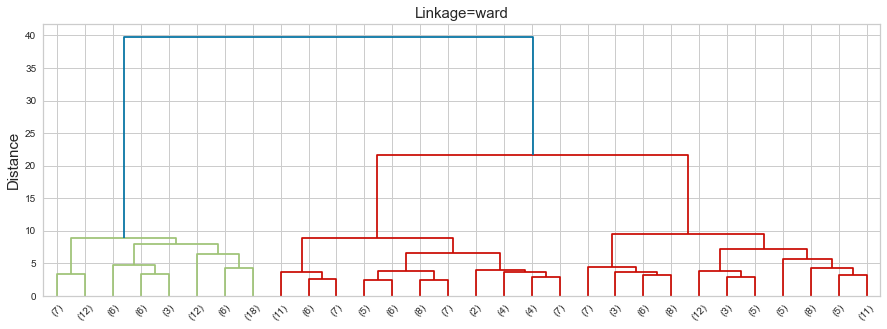

In [12]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

fig.subplots_adjust(hspace=0.5)

linkages = ['complete', 'single', 'average','centroid']

for link, axis in zip(linkages, fig.axes):
    hc = linkage(y = market_scaled, method=link,metric = 'euclidean') 
    axis.set_title("Linkage=%s" % link, size=15)
    axis.set_ylabel('Distance', size=15)
    dendrogram(hc, ax=axis, labels=market_scaled.index, truncate_mode='lastp',p = 25)

ward = linkage(y = market_scaled, method='ward',metric = 'euclidean')
plt.figure(figsize=[15,5])
dendrogram(ward, labels=market_scaled.index, truncate_mode='lastp',p = 30)
plt.ylabel('Distance', size=15)
plt.title("Linkage=%s" % 'ward', size=15)
plt.show()

_The above dendogram is based on `'complete', 'single', 'average', 'centroid' and 'ward'` linkage methods with metrics as `Euclidean` distance. Euclidean distance is the shortest path between source and destination which is a straight line._

1. _**Single Linkage:** For two clusters A and B, the single linkage returns the minimum distance between two points._

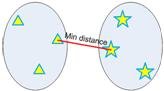 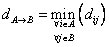

2. _**Complete Linkage:** For two clusters A and B, the single linkage returns the maximum distance between two points._

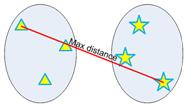 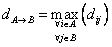

3. _**Average Linkage:** For two clusters A and B, first for the distance between any data-point in A and any data-point in B and then the arithmetic mean of these distances are calculated. Average Linkage returns this value of the arithmetic mean._

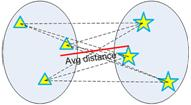 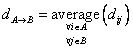

4. _**Centroid Linkage:** The distance between two clusters A and B is the distance between the two mean vectors of the clusters. At each stage of the process we combine the two clusters that have the smallest centroid distance._

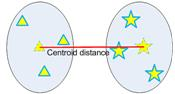 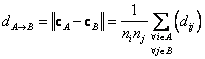

5. _**Ward's Linkage:** Like other clustering methods, Ward's method starts with n clusters, each containing a single object. These n clusters are combined to make one signle cluster._




_`Ward Linkage` as it says that the distance between two clusters, A and B, is how much the sum of squares will increase when we merge them. With hierarchical clustering, the sum of squares starts out at zero (because every point is in its own cluster) and then grows as we merge clusters. Ward’s method keeps this growth as small as possible._

_For better analysis, let the total number of clusters be 3._

In [13]:
cluster_model = AgglomerativeClustering(n_clusters = 3,# Number of clusters
                                  affinity = 'euclidean',# Distance metric
                                 linkage = 'ward')# Linkage method
clus = cluster_model.fit_predict(scaled_df)
clus

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0], dtype=int64)

_Adding the cluster lables in the main dataset._

In [14]:
market['Cluster'] = clus
market.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0    19.940            16.920                        0.875            6.675   
1    15.990            14.890                        0.906            5.363   
2    18.950            16.420                        0.883            6.248   
3    10.830            12.960                        0.810            5.278   
4    17.990            15.860                        0.899            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  Cluster  
0         3.763            3.252                         6.550        1  
1         3.582            3.336                         5.144        0  
2         3.755            3.368                         6.148        1  
3         2.641            5.182                         5.185        2  
4         3.694            2.068                         5.837        1

_Let's create a chart to visualize how the clusters are distributed_

In [15]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles for our chart is ', total_num_tiles)

Total number of tiles for our chart is  400


_Value counts for each clusters_

In [16]:
waffle = market['Cluster'].value_counts().to_frame()
waffle.reset_index(inplace=True)
waffle.rename(columns={waffle.columns[0]:'Clusters',waffle.columns[1]:'Cluster Labels'},inplace=True)
waffle

Clusters  Cluster Labels
0         0              73
1         1              70
2         2              67

_Computing the proportion of each cluster to fit into the waffle chart._

In [17]:
# compute the proportion of each category with respect to the total
total_values = sum(waffle['Cluster Labels'])
category_proportions = [(float(value) / total_values) for value in waffle['Cluster Labels']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print(waffle.Clusters.values[i],':',proportion)

0 : 0.3476190476190476
1 : 0.3333333333333333
2 : 0.319047619047619


_Computing the number of tiles for each catagory._

In [18]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (waffle.Clusters.values[i], ': ' , tiles)

0 :  139
1 :  133
2 :  128


_Populating the waffle chart_

In [19]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


<Figure size 576x396 with 0 Axes>

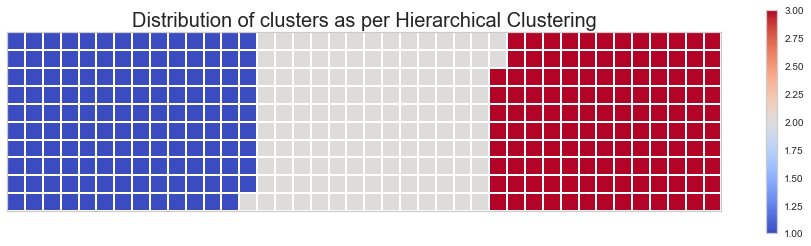

Cluster 1 has 73 records
Cluster 2 has 70 records
Cluster 3 has 67 records


In [20]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.title("Distribution of clusters as per Hierarchical Clustering",fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()
print("Cluster 1 has {} records".format(waffle.iloc[0,1]))
print("Cluster 2 has {} records".format(waffle.iloc[1,1]))
print("Cluster 3 has {} records".format(waffle.iloc[2,1]))

_Name the clusters instead of numbers._

In [21]:
market['Cluster'] = market['Cluster'].map({0:'Cluster 1',1:'Cluster 2',2:'Cluster 3'})
market.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0    19.940            16.920                        0.875            6.675   
1    15.990            14.890                        0.906            5.363   
2    18.950            16.420                        0.883            6.248   
3    10.830            12.960                        0.810            5.278   
4    17.990            15.860                        0.899            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  
0         3.763            3.252                         6.550  Cluster 2  
1         3.582            3.336                         5.144  Cluster 1  
2         3.755            3.368                         6.148  Cluster 2  
3         2.641            5.182                         5.185  Cluster 3  
4         3.694            2.068                         5.837  Cluster 2

_**Profiling Clusters - Understanding what the clusters mean**_

### Cluster 1

_Filtering records from dataframe that are grouped in cluster 1_

In [22]:
cluster1 = market[market['Cluster']=='Cluster 1']
cluster1.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
1     15.990            14.890                        0.906            5.363   
7     13.740            14.050                        0.874            5.482   
11    14.090            14.410                        0.853            5.717   
14    12.100            13.150                        0.879            5.105   
16    16.140            14.990                        0.903            5.658   

    credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  
1          3.582            3.336                         5.144  Cluster 1  
7          3.114            2.932                         4.825  Cluster 1  
11         3.186            3.920                         5.299  Cluster 1  
14         2.941            2.201                         5.056  Cluster 1  
16         3.562            1.355                         5.175  Cluster 1

_Visualising cluster 1_

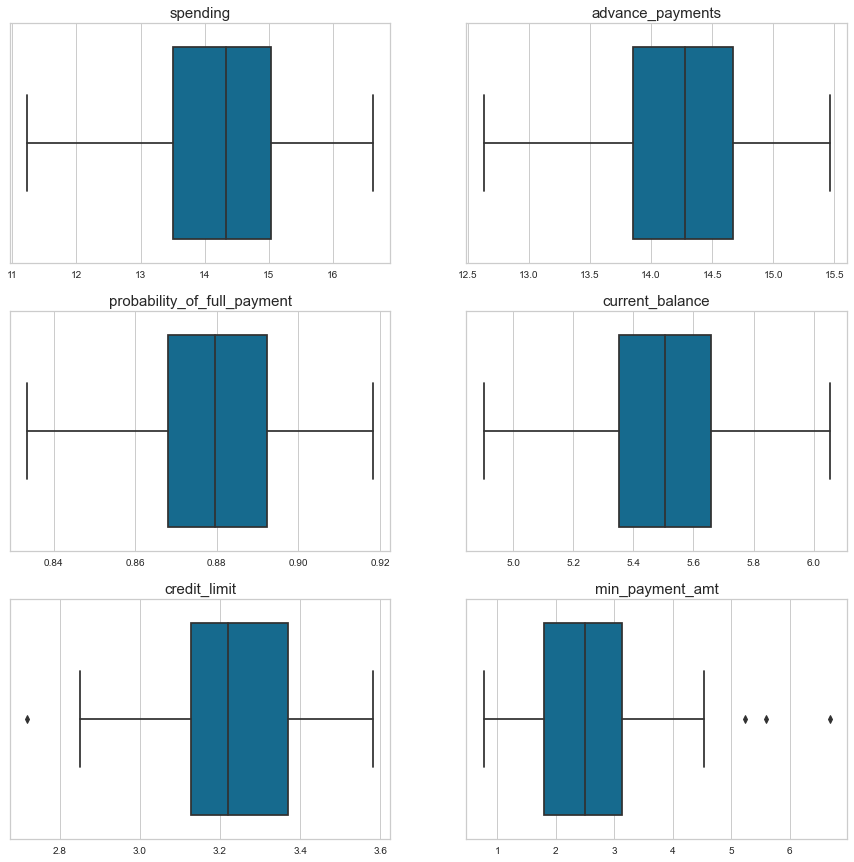

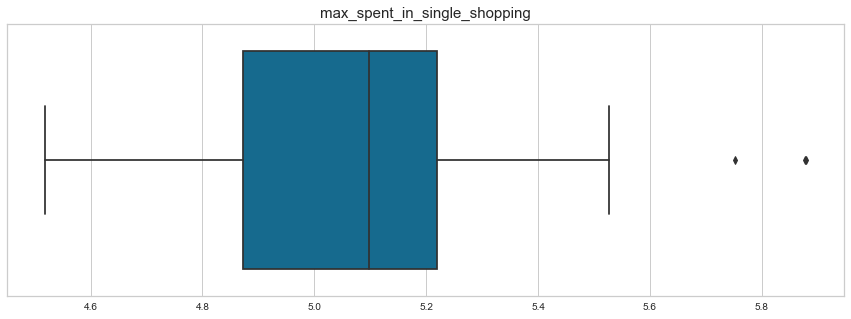

In [23]:
fig,axes = plt.subplots(nrows = 3,ncols = 2,figsize=[15,15])
for c,i in zip(cluster1.iloc[:,:-2].columns,axes.flatten()):
    sns.boxplot(cluster1[c],ax = i)
    i.set_title(c,fontsize=15)
    i.set_xlabel("")
    
plt.figure(figsize=[15,5])
sns.boxplot(cluster1['max_spent_in_single_shopping'])
plt.title('max_spent_in_single_shopping',fontsize=15)
plt.xlabel("")
plt.show()

In [24]:
stats1 = cluster1.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])
col_names = ['spending (in 1000s)','advance_payments (in 100s)', 'probability_of_full_payment',
       'current_balance (in 1000s)', 'credit_limit (in 10000s)', 'min_payment_amt (in 100s)',
       'max_spent_in_single_shopping (in 1000s)']
stats1.columns = col_names
stats1

spending (in 1000s)  advance_payments (in 100s)  \
count               73.000                      73.000   
mean                14.199                      14.234   
std                  1.231                       0.600   
min                 11.230                      12.630   
25%                 13.500                      13.850   
50%                 14.330                      14.280   
75%                 15.030                      14.670   
95%                 16.050                      15.126   
99%                 16.320                      15.323   
max                 16.630                      15.460   

       probability_of_full_payment  current_balance (in 1000s)  \
count                       73.000                      73.000   
mean                         0.879                       5.478   
std                          0.017                       0.241   
min                          0.834                       4.902   
25%                          0.868                       5.351   
50%                          0.880                       5.504   
75%                          0.892                       5.658   
95%                          0.905                       5.828   
99%                          0.916                       5.957   
max                          0.918                       6.053   

       credit_limit (in 10000s)  min_payment_amt (in 100s)  \
count                    73.000                     73.000   
mean                      3.226                      2.612   
std                       0.179                      1.118   
min                       2.719                      0.765   
25%                       3.129                      1.791   
50%                       3.221                      2.504   
75%                       3.371                      3.136   
95%                       3.482                      4.328   
99%                       3.568                      5.899   
max                       3.582                      6.685   

       max_spent_in_single_shopping (in 1000s)  
count                                   73.000  
mean                                     5.086  
std                                      0.276  
min                                      4.519  
25%                                      4.872  
50%                                      5.097  
75%                                      5.220  
95%                                      5.503  
99%                                      5.878  
max                                      5.879

### Cluster 2

_Filtering records from dataframe that are grouped in cluster 2_

In [25]:
cluster2 = market[market['Cluster']=='Cluster 2']
cluster2.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.940            16.920                        0.875            6.675   
2     18.950            16.420                        0.883            6.248   
4     17.990            15.860                        0.899            5.890   
8     18.170            16.260                        0.864            6.271   
10    18.550            16.220                        0.886            6.153   

    credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  
0          3.763            3.252                         6.550  Cluster 2  
2          3.755            3.368                         6.148  Cluster 2  
4          3.694            2.068                         5.837  Cluster 2  
8          3.512            2.853                         6.273  Cluster 2  
10         3.674            1.738                         5.894  Cluster 2

_Visualising cluster 2_

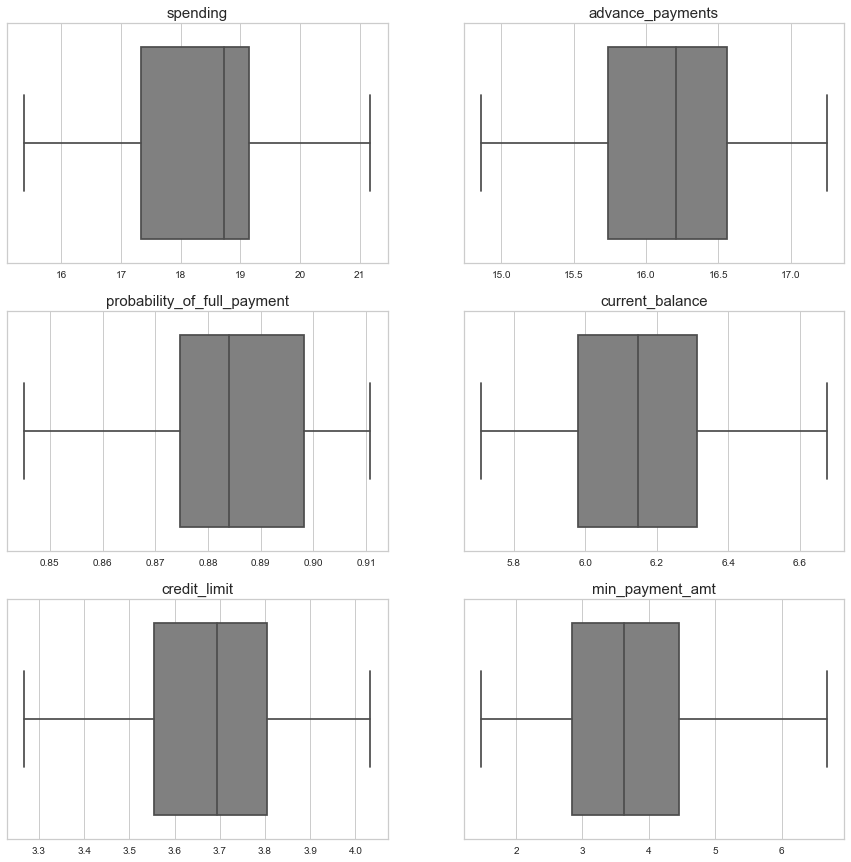

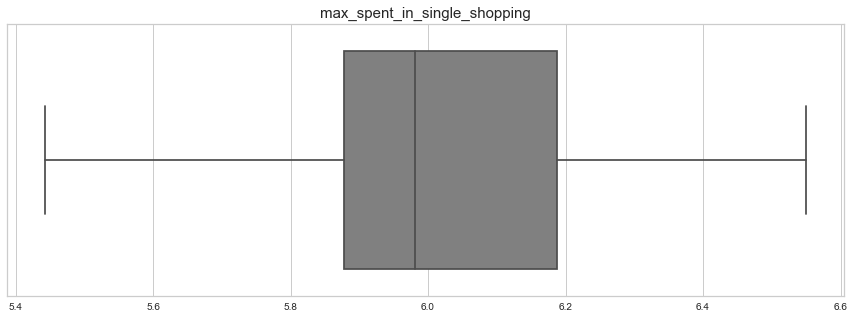

In [26]:
fig,axes = plt.subplots(nrows = 3,ncols = 2,figsize=[15,15])
for c,i in zip(cluster2.iloc[:,:-2].columns,axes.flatten()):
    sns.boxplot(cluster2[c],ax = i,color='grey')
    i.set_title(c,fontsize=15)
    i.set_xlabel("")
    
plt.figure(figsize=[15,5])
sns.boxplot(cluster2['max_spent_in_single_shopping'],color='grey')
plt.title('max_spent_in_single_shopping',fontsize=15)
plt.xlabel("")
plt.show()

In [27]:
stats2 = cluster2.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])
stats2.columns = col_names
stats2

spending (in 1000s)  advance_payments (in 100s)  \
count               70.000                      70.000   
mean                18.371                      16.145   
std                  1.381                       0.599   
min                 15.380                      14.860   
25%                 17.330                      15.737   
50%                 18.720                      16.210   
75%                 19.137                      16.558   
95%                 20.498                      17.041   
99%                 21.035                      17.236   
max                 21.180                      17.250   

       probability_of_full_payment  current_balance (in 1000s)  \
count                       70.000                      70.000   
mean                         0.884                       6.158   
std                          0.015                       0.246   
min                          0.845                       5.709   
25%                          0.875                       5.979   
50%                          0.884                       6.149   
75%                          0.898                       6.312   
95%                          0.908                       6.576   
99%                          0.909                       6.669   
max                          0.911                       6.675   

       credit_limit (in 10000s)  min_payment_amt (in 100s)  \
count                    70.000                     70.000   
mean                      3.685                      3.639   
std                       0.175                      1.208   
min                       3.268                      1.472   
25%                       3.554                      2.845   
50%                       3.694                      3.629   
75%                       3.805                      4.459   
95%                       3.948                      5.668   
99%                       4.032                      6.212   
max                       4.033                      6.682   

       max_spent_in_single_shopping (in 1000s)  
count                                   70.000  
mean                                     6.017  
std                                      0.251  
min                                      5.443  
25%                                      5.877  
50%                                      5.982  
75%                                      6.188  
95%                                      6.450  
99%                                      6.514  
max                                      6.550

### Cluster 3

_Filtering records from dataframe that are grouped in cluster 3_

In [28]:
cluster3 = market[market['Cluster']=='Cluster 3']
cluster3.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
3     10.830            12.960                        0.810            5.278   
5     12.700            13.410                        0.887            5.183   
6     12.020            13.330                        0.850            5.350   
9     11.230            12.880                        0.851            5.140   
12    12.150            13.450                        0.844            5.417   

    credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  
3          2.641            5.182                         5.185  Cluster 3  
5          3.091            8.456                         5.000  Cluster 3  
6          2.810            4.271                         5.308  Cluster 3  
9          2.795            4.325                         5.003  Cluster 3  
12         2.837            3.638                         5.338  Cluster 3

_Visualising cluster 3_

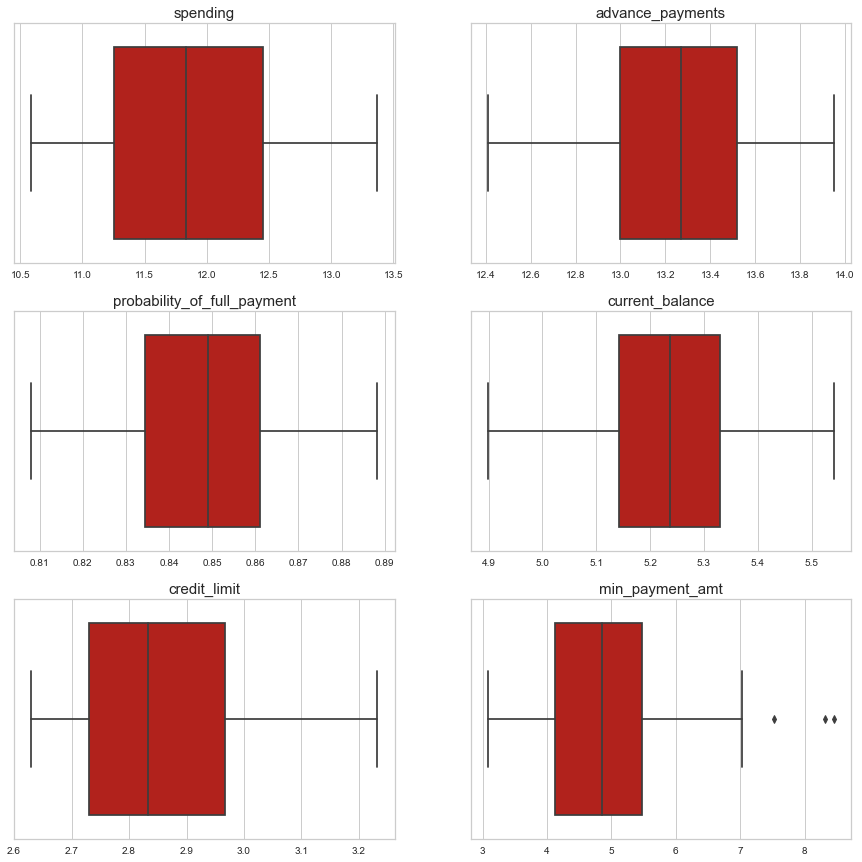

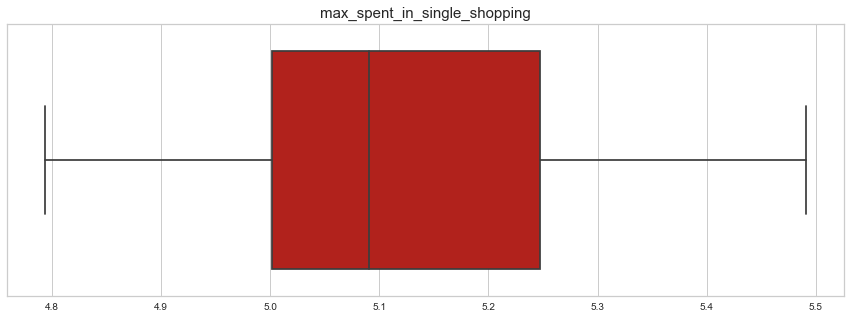

In [29]:
fig,axes = plt.subplots(nrows = 3,ncols = 2,figsize=[15,15])
for c,i in zip(cluster3.iloc[:,:-2].columns,axes.flatten()):
    sns.boxplot(cluster3[c],ax = i,color='r')
    i.set_title(c,fontsize=15)
    i.set_xlabel("")
    
plt.figure(figsize=[15,5])
sns.boxplot(cluster3['max_spent_in_single_shopping'],color='r')
plt.title('max_spent_in_single_shopping',fontsize=15)
plt.xlabel("")
plt.show()

In [30]:
stats3 = cluster3.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])
stats3.columns = col_names
stats3

spending (in 1000s)  advance_payments (in 100s)  \
count               67.000                      67.000   
mean                11.872                      13.257   
std                  0.736                       0.353   
min                 10.590                      12.410   
25%                 11.250                      13.000   
50%                 11.830                      13.270   
75%                 12.450                      13.520   
95%                 13.161                      13.777   
99%                 13.350                      13.943   
max                 13.370                      13.950   

       probability_of_full_payment  current_balance (in 1000s)  \
count                       67.000                      67.000   
mean                         0.848                       5.239   
std                          0.020                       0.136   
min                          0.808                       4.899   
25%                          0.834                       5.143   
50%                          0.849                       5.236   
75%                          0.861                       5.329   
95%                          0.883                       5.449   
99%                          0.888                       5.511   
max                          0.888                       5.541   

       credit_limit (in 10000s)  min_payment_amt (in 100s)  \
count                    67.000                     67.000   
mean                      2.849                      4.949   
std                       0.143                      1.171   
min                       2.630                      3.082   
25%                       2.731                      4.117   
50%                       2.833                      4.857   
75%                       2.967                      5.470   
95%                       3.086                      7.022   
99%                       3.163                      8.363   
max                       3.232                      8.456   

       max_spent_in_single_shopping (in 1000s)  
count                                   67.000  
mean                                     5.122  
std                                      0.157  
min                                      4.794  
25%                                      5.002  
50%                                      5.091  
75%                                      5.247  
95%                                      5.358  
99%                                      5.457  
max                                      5.491

_**Cluster profiling based on Hierarchical Clustering**_

In [31]:
def cluster_profiling(stats,cluster_no):
    for i in stats.columns:
        avg = stats.loc['mean',i]
        print("The average {} for Cluster {} customers is: {}".format(i,cluster_no,round(avg,4)))
        median = stats.loc['50%',i]
        perc_95 = stats.loc['95%',i]
        perc_99 = stats.loc['99%',i]
        print("50% of the customers have {} of {}, 95% have of {} and 99% have of {}.".format(i,round(median,4),round(perc_95,4),round(perc_99,4)))
        IQR = stats.loc['75%',i] + stats.loc['25%',i]
        print("Interquartile range for {} is {}. IQR tells us the range of the middle half of the data.\n".format(i,round(IQR,4)))

In [32]:
cluster_profiling(stats=stats1,cluster_no=1)

The average spending (in 1000s) for Cluster 1 customers is: 14.199
50% of the customers have spending (in 1000s) of 14.33, 95% have of 16.05 and 99% have of 16.3204.
Interquartile range for spending (in 1000s) is 28.53. IQR tells us the range of the middle half of the data.

The average advance_payments (in 100s) for Cluster 1 customers is: 14.2336
50% of the customers have advance_payments (in 100s) of 14.28, 95% have of 15.126 and 99% have of 15.3232.
Interquartile range for advance_payments (in 100s) is 28.52. IQR tells us the range of the middle half of the data.

The average probability_of_full_payment for Cluster 1 customers is: 0.8792
50% of the customers have probability_of_full_payment of 0.8796, 95% have of 0.9053 and 99% have of 0.9161.
Interquartile range for probability_of_full_payment is 1.7603. IQR tells us the range of the middle half of the data.

The average current_balance (in 1000s) for Cluster 1 customers is: 5.4782
50% of the customers have current_balance (in 100

In [33]:
cluster_profiling(stats=stats2,cluster_no=2)

The average spending (in 1000s) for Cluster 2 customers is: 18.3714
50% of the customers have spending (in 1000s) of 18.72, 95% have of 20.4985 and 99% have of 21.0351.
Interquartile range for spending (in 1000s) is 36.4675. IQR tells us the range of the middle half of the data.

The average advance_payments (in 100s) for Cluster 2 customers is: 16.1454
50% of the customers have advance_payments (in 100s) of 16.21, 95% have of 17.041 and 99% have of 17.2362.
Interquartile range for advance_payments (in 100s) is 32.295. IQR tells us the range of the middle half of the data.

The average probability_of_full_payment for Cluster 2 customers is: 0.8844
50% of the customers have probability_of_full_payment of 0.884, 95% have of 0.9077 and 99% have of 0.9089.
Interquartile range for probability_of_full_payment is 1.7729. IQR tells us the range of the middle half of the data.

The average current_balance (in 1000s) for Cluster 2 customers is: 6.1582
50% of the customers have current_balance (i

In [34]:
cluster_profiling(stats=stats3,cluster_no=3)

The average spending (in 1000s) for Cluster 3 customers is: 11.8724
50% of the customers have spending (in 1000s) of 11.83, 95% have of 13.161 and 99% have of 13.3502.
Interquartile range for spending (in 1000s) is 23.7. IQR tells us the range of the middle half of the data.

The average advance_payments (in 100s) for Cluster 3 customers is: 13.257
50% of the customers have advance_payments (in 100s) of 13.27, 95% have of 13.777 and 99% have of 13.9434.
Interquartile range for advance_payments (in 100s) is 26.52. IQR tells us the range of the middle half of the data.

The average probability_of_full_payment for Cluster 3 customers is: 0.8481
50% of the customers have probability_of_full_payment of 0.8491, 95% have of 0.8833 and 99% have of 0.8877.
Interquartile range for probability_of_full_payment is 1.6955. IQR tells us the range of the middle half of the data.

The average current_balance (in 1000s) for Cluster 3 customers is: 5.2389
50% of the customers have current_balance (in 100

_From the above inferences we can note that credit usage for customers in `Cluster 1` is average for `Cluster 2` is high and for `Cluster 3` is low:_

In [35]:
market['Credit Usage'] = market['Cluster'].map({'Cluster 1':'Avergae','Cluster 2':'High',
                                             'Cluster 3':'Low'})
market.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0    19.940            16.920                        0.875            6.675   
1    15.990            14.890                        0.906            5.363   
2    18.950            16.420                        0.883            6.248   
3    10.830            12.960                        0.810            5.278   
4    17.990            15.860                        0.899            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  \
0         3.763            3.252                         6.550  Cluster 2   
1         3.582            3.336                         5.144  Cluster 1   
2         3.755            3.368                         6.148  Cluster 2   
3         2.641            5.182                         5.185  Cluster 3   
4         3.694            2.068                         5.837  Cluster 2   

  Credit Usage  
0         High  
1      Avergae  
2         High  
3          Low  
4         High

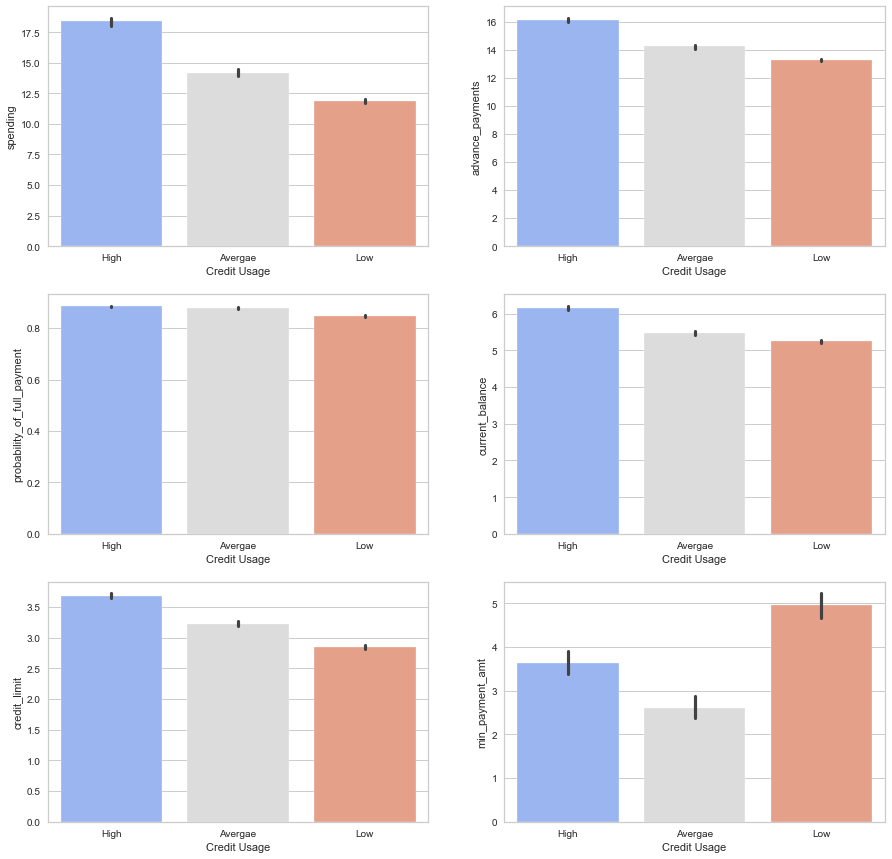

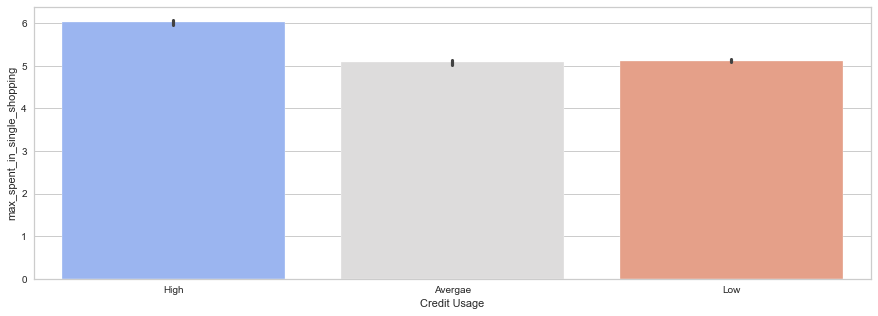

In [36]:
fig, axes = plt.subplots(3,2,figsize=[15,15])
sns.barplot(market['Credit Usage'],market['spending'],palette='coolwarm',ax=axes[0,0])
sns.barplot(market['Credit Usage'],market['advance_payments'],palette='coolwarm',ax=axes[0,1])
sns.barplot(market['Credit Usage'],market['probability_of_full_payment'],palette='coolwarm',ax=axes[1,0])
sns.barplot(market['Credit Usage'],market['current_balance'],palette='coolwarm',ax=axes[1,1])
sns.barplot(market['Credit Usage'],market['credit_limit'],palette='coolwarm',ax=axes[2,0])
sns.barplot(market['Credit Usage'],market['min_payment_amt'],palette='coolwarm',ax=axes[2,1])
plt.show()

plt.figure(figsize=[15,5])
sns.barplot(market['Credit Usage'],market['max_spent_in_single_shopping'],palette='coolwarm')
plt.show()

__1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.__<a class="anchor" id="section1.4"></a>

_Let's take a look at the Scaled data for market dataset:_

In [37]:
market_scaled = market_kmeans.copy()
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(market_scaled)
market_scaled = pd.DataFrame(scaled_df, index=market_scaled.index, columns=market_scaled.columns)
market_scaled.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     1.754             1.812                        0.178            2.368   
1     0.394             0.254                        1.502           -0.601   
2     1.413             1.428                        0.505            1.401   
3    -1.384            -1.228                       -2.592           -0.793   
4     1.083             0.998                        1.196            0.592   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         1.339           -0.299                         2.329  
1         0.858           -0.243                        -0.539  
2         1.317           -0.221                         1.509  
3        -1.639            0.988                        -0.455  
4         1.155           -1.088                         0.875

_The within-cluster sum of squares is a measure of the variability of the observations within each cluster._

_Below table is within sum of squares to check optimum number of clusters. To decide optimum number of cluster we will choose the range from 2 to 10 i.e. minimum number of clusters will be 2 till the total number of clusters reaches upto 10._

In [38]:
wss = [] # Within cluster Sum of squares
for i in range(2,11): # iterating through various number of clusters 1 to 10
    k_means = KMeans(n_clusters = i) # creating the kmeans model
    k_means.fit(market_scaled) # fitting the standardized data onto the kmeans model
    wss.append(k_means.inertia_) # Extracting the Within sum of squares or inertia from the model
wss_df = pd.DataFrame(wss,columns = ['WSS']) # putting all the WSS values in a data frame
wss_df['Num_of_clusters'] = range(2,11)
wss_df = wss_df[['Num_of_clusters','WSS']]
wss_df.T

0       1       2       3       4       5       6  \
Num_of_clusters   2.000   3.000   4.000   5.000   6.000   7.000   8.000   
WSS             659.172 430.659 371.302 326.363 289.467 263.353 241.577   

                      7       8  
Num_of_clusters   9.000  10.000  
WSS             222.653 205.721

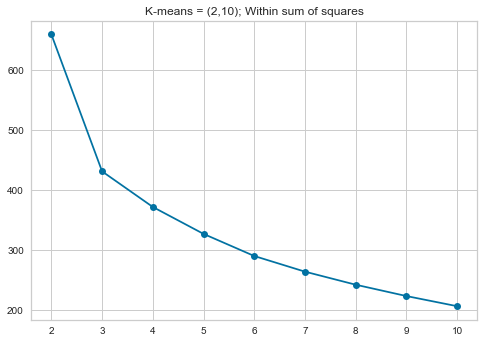

In [39]:
# Plotting the above data in the form of a scree plot
fig,axes = plt.subplots()
plt.plot(wss_df['Num_of_clusters'],wss_df['WSS'],marker='o')
plt.title("K-means = (2,10); Within sum of squares");

_From WSS plot we can see that the optimum number of clusters is when k=3._

----

_Let's check the Elbow curve to determine optimum number of clusters._

_The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters._

In [40]:
#the total number of points equally divided among clusters
X, y = make_blobs(n_samples=500,random_state=0)

_Here we will check the elbow curve for when k in range of 2 to 11_

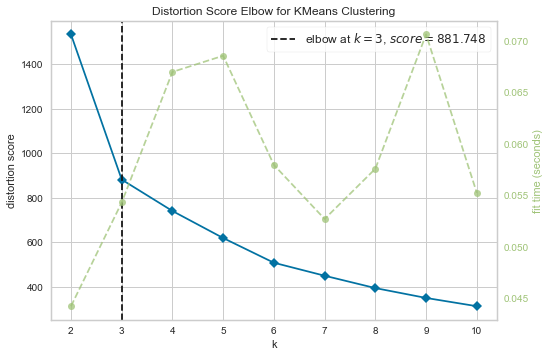

In [41]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();    # Draw/show/poof the data

_**Inferences**_

-----

_From this curve we can assume that the optimum number of cluster we can take is 3, where distortion score is 881.748_

_**Distortion Score:** It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used. Inertia: It is the sum of squared distances of samples to their closest cluster center._

----

_Next step is to check the Silhouette score where k=3 and k=5 for comparing the models:_

_**Silhouette Coefficient** or **Silhouette score** is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1._

_1: Means clusters are well apart from each other and clearly distinguished._

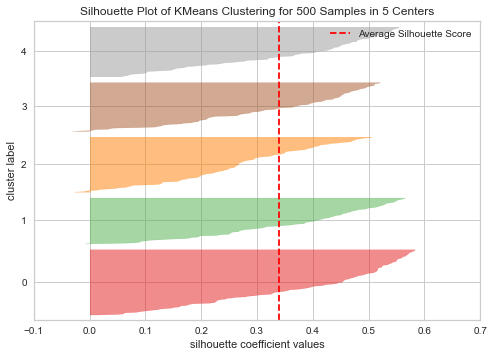

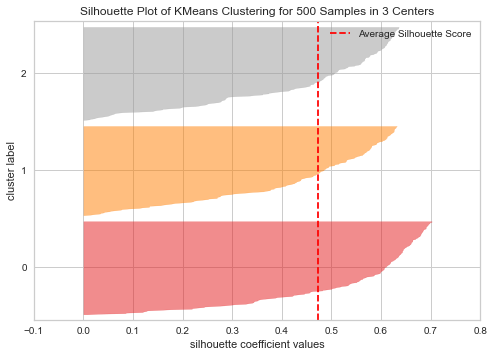

In [42]:
model1 = KMeans(5,random_state=0)
model2 = KMeans(3,random_state=0)
visualizer6 = SilhouetteVisualizer(model1)
visualizer3 = SilhouetteVisualizer(model2)
visualizer6.fit(X)    # Fit the data to the visualizer
visualizer6.poof();    # Draw/show/poof the data

visualizer3.fit(X)    # Fit the data to the visualizer
visualizer3.poof();    # Draw/show/poof the data

In [43]:
# model-1 Number of clusters 3
model1 = KMeans(3,random_state=0)
model1.fit(market_scaled)
labels_mod1 = model1.labels_
labels_mod1
#len(labels_mod1)

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [44]:
# model-2 Number of clusters 5
model2 = KMeans(5,random_state=0)
model2.fit(market_scaled)
labels_mod2 = model2.labels_
labels_mod2


array([4, 0, 4, 3, 4, 3, 3, 2, 4, 3, 4, 0, 3, 4, 2, 2, 0, 3, 2, 3, 2, 3,
       4, 3, 0, 1, 2, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 4, 4, 0, 1, 4,
       3, 2, 0, 4, 4, 4, 3, 4, 4, 4, 4, 1, 3, 3, 3, 4, 0, 3, 3, 1, 0, 4,
       4, 0, 4, 2, 0, 2, 4, 4, 3, 4, 0, 3, 1, 0, 0, 2, 0, 4, 3, 1, 1, 1,
       1, 3, 2, 4, 0, 3, 2, 4, 4, 1, 3, 1, 2, 4, 0, 4, 0, 4, 4, 3, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 2, 3, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 3, 0,
       2, 4, 3, 1, 4, 3, 1, 0, 1, 0, 3, 2, 2, 3, 4, 3, 0, 3, 0, 2, 0, 1,
       2, 0, 2, 3, 0, 1, 4, 2, 4, 1, 4, 3, 1, 0, 2, 3, 0, 3, 0, 4, 4, 4,
       0, 2, 1, 3, 0, 2, 2, 0, 1, 1, 2, 0, 2, 3, 2, 0, 3, 4, 0, 1, 4, 3,
       4, 3, 0, 1, 0, 3, 1, 2, 1, 0, 0, 1])

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score
each_score = silhouette_samples(X = market_scaled,labels = clus) # Calculation of the sillouhette width for each observation
each_score[:10]

array([0.57266524, 0.30733616, 0.63963843, 0.51605071, 0.39645457,
       0.25309678, 0.47732255, 0.36848217, 0.52642334, 0.52642989])

In [46]:
# Comparing the Silhouette scores of the kmeans models 1 and 2 
sil_score_mod1 = silhouette_score(X = market_scaled,labels = labels_mod1)
sil_score_mod2 = silhouette_score(X = market_scaled,labels = labels_mod2)
print('Silhouette Score of Model 1 (k=3): {:.3f}'.format(sil_score_mod1))
print('Silhouette Score of Model 2 (k=5): {:.3f}'.format(sil_score_mod2))
print()
if sil_score_mod1 > sil_score_mod2:
    print("Silhouette Score of Model 1 (k=3) is better than Silhouette Score of Model 2 (k=5)")
else:
    print("Silhouette Score of Model 2 (k=5) is better than Silhouette Score of Model 1 (k=3)")

Silhouette Score of Model 1 (k=3): 0.401
Silhouette Score of Model 2 (k=5): 0.283

Silhouette Score of Model 1 (k=3) is better than Silhouette Score of Model 2 (k=5)


_From the below Silhouette Score Plot we will check the goodness of the model when we take n clusters from the range of 3 to 20:_

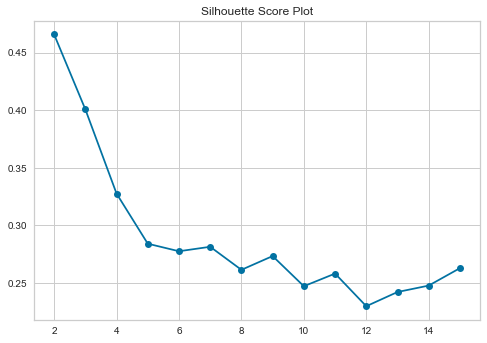

In [47]:
sil_score = []
for i in range(2,16):
    k_means = KMeans(n_clusters = i,random_state=1234)
    k_means.fit(market_scaled)
    clus = k_means.labels_
    sil_score.append(silhouette_score(X=market_scaled,labels = clus))
fig,axes = plt.subplots()
plt.plot(range(2,16),sil_score,marker='o')
axes.set_title('Silhouette Score Plot');

_As per the Silhouette score and the plot the ideal number of clusters we should go is 3._

In [48]:
final_kmeans = KMeans(n_clusters=3,random_state=0)
final_kmeans.fit(market_scaled)
clus = final_kmeans.labels_
market_kmeans['Cluster'] = clus
market_kmeans['Cluster'] = market_kmeans['Cluster'].map({0:'Cluster-1',1:'Cluster-2',2:'Cluster-3',3:'Cluster-4',4:'Cluster-5'})
market_kmeans.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0    19.940            16.920                        0.875            6.675   
1    15.990            14.890                        0.906            5.363   
2    18.950            16.420                        0.883            6.248   
3    10.830            12.960                        0.810            5.278   
4    17.990            15.860                        0.899            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  
0         3.763            3.252                         6.550  Cluster-3  
1         3.582            3.336                         5.144  Cluster-1  
2         3.755            3.368                         6.148  Cluster-3  
3         2.641            5.182                         5.185  Cluster-2  
4         3.694            2.068                         5.837  Cluster-3

_Let's create a chart to visualize how the clusters are distributed_

In [49]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles for our chart is ', total_num_tiles)

Total number of tiles for our chart is  400


_Value counts for each clusters_

In [50]:
waffle = market_kmeans['Cluster'].value_counts().to_frame()
waffle.reset_index(inplace=True)
waffle.rename(columns={waffle.columns[0]:'Clusters',waffle.columns[1]:'Cluster Labels'},inplace=True)
waffle

Clusters  Cluster Labels
0  Cluster-2              72
1  Cluster-1              71
2  Cluster-3              67

_Computing the proportion of each cluster to fit into the waffle chart._

In [51]:
# compute the proportion of each category with respect to the total
total_values = sum(waffle['Cluster Labels'])
category_proportions = [(float(value) / total_values) for value in waffle['Cluster Labels']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print(waffle.Clusters.values[i],':',proportion)

Cluster-2 : 0.34285714285714286
Cluster-1 : 0.3380952380952381
Cluster-3 : 0.319047619047619


_Computing the number of tiles for each catagory._

In [52]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (waffle.Clusters.values[i], ': ' , tiles)

Cluster-2 :  137
Cluster-1 :  135
Cluster-3 :  128


_Populating the waffle chart_

In [53]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


<Figure size 576x396 with 0 Axes>

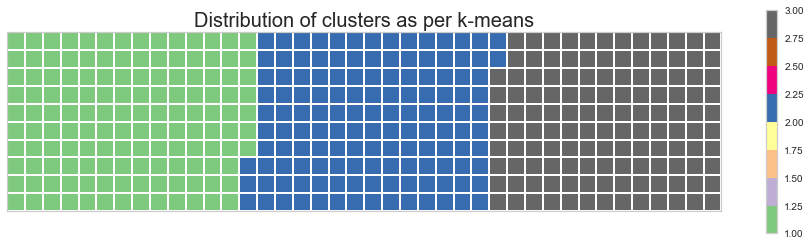

Cluster 1 has 72 records
Cluster 2 has 71 records
Cluster 3 has 67 records


In [54]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.Accent
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.title("Distribution of clusters as per k-means",fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()
print("Cluster 1 has {} records".format(waffle.iloc[0,1]))
print("Cluster 2 has {} records".format(waffle.iloc[1,1]))
print("Cluster 3 has {} records".format(waffle.iloc[2,1]))

_**Profiling Clusters - Understanding what the clusters mean**_

### Cluster 1


_Filtering records from dataframe that are grouped in cluster 1_

In [55]:
cluster1 = market_kmeans[market_kmeans['Cluster']=='Cluster-1']
cluster1.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
1     15.990            14.890                        0.906            5.363   
7     13.740            14.050                        0.874            5.482   
11    14.090            14.410                        0.853            5.717   
14    12.100            13.150                        0.879            5.105   
16    16.140            14.990                        0.903            5.658   

    credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  
1          3.582            3.336                         5.144  Cluster-1  
7          3.114            2.932                         4.825  Cluster-1  
11         3.186            3.920                         5.299  Cluster-1  
14         2.941            2.201                         5.056  Cluster-1  
16         3.562            1.355                         5.175  Cluster-1

_Visualising cluster 1_

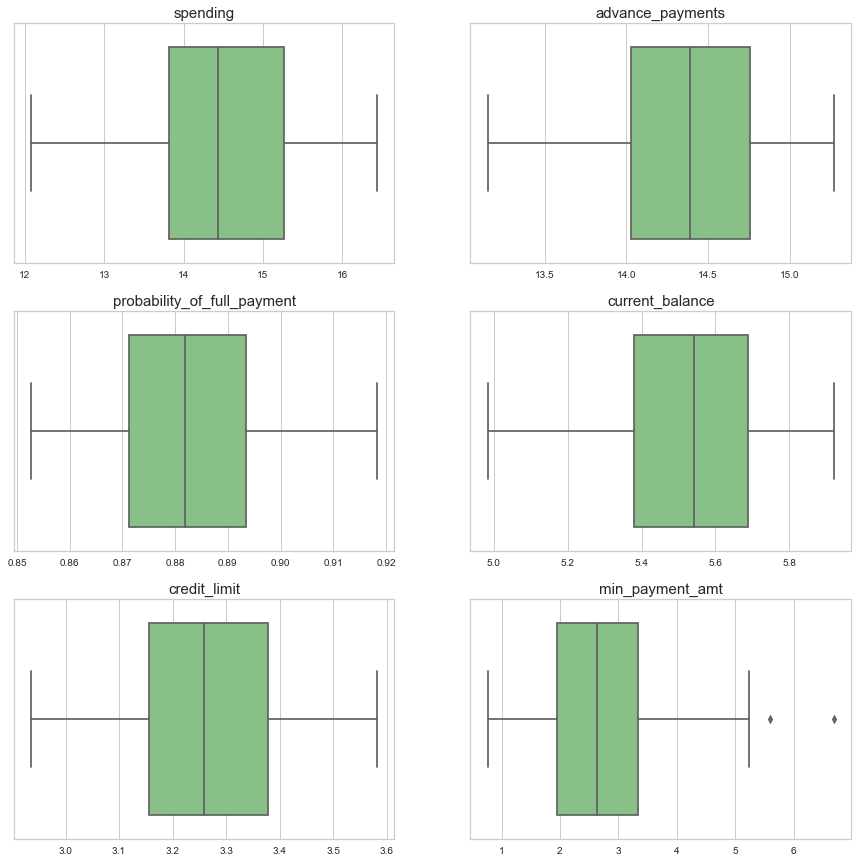

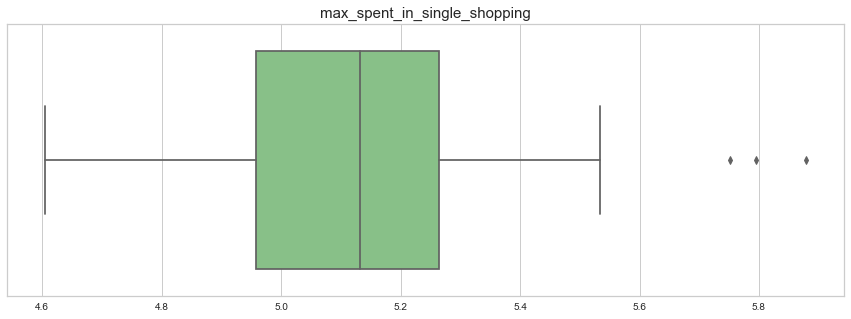

In [56]:
fig,axes = plt.subplots(nrows = 3,ncols = 2,figsize=[15,15])
for c,i in zip(cluster1.iloc[:,:-2].columns,axes.flatten()):
    sns.boxplot(cluster1[c],ax = i,palette='Accent')
    i.set_title(c,fontsize=15)
    i.set_xlabel("")
    
plt.figure(figsize=[15,5])
sns.boxplot(cluster1['max_spent_in_single_shopping'],palette='Accent')
plt.title('max_spent_in_single_shopping',fontsize=15)
plt.xlabel("")
plt.show()

In [57]:
stats1 = cluster1.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])
col_names = ['spending (in 1000s)','advance_payments (in 100s)', 'probability_of_full_payment',
       'current_balance (in 1000s)', 'credit_limit (in 10000s)', 'min_payment_amt (in 100s)',
       'max_spent_in_single_shopping (in 1000s)']
stats1.columns = col_names
stats1

spending (in 1000s)  advance_payments (in 100s)  \
count               71.000                      71.000   
mean                14.438                      14.338   
std                  1.057                       0.526   
min                 12.080                      13.150   
25%                 13.820                      14.030   
50%                 14.430                      14.390   
75%                 15.260                      14.760   
95%                 16.130                      15.130   
99%                 16.272                      15.256   
max                 16.440                      15.270   

       probability_of_full_payment  current_balance (in 1000s)  \
count                       71.000                      71.000   
mean                         0.882                       5.515   
std                          0.016                       0.225   
min                          0.853                       4.984   
25%                          0.871                       5.380   
50%                          0.882                       5.541   
75%                          0.893                       5.690   
95%                          0.905                       5.855   
99%                          0.916                       5.895   
max                          0.918                       5.920   

       credit_limit (in 10000s)  min_payment_amt (in 100s)  \
count                    71.000                     71.000   
mean                      3.259                      2.707   
std                       0.155                      1.176   
min                       2.936                      0.765   
25%                       3.155                      1.951   
50%                       3.258                      2.640   
75%                       3.378                      3.332   
95%                       3.506                      4.691   
99%                       3.568                      5.921   
max                       3.582                      6.685   

       max_spent_in_single_shopping (in 1000s)  
count                                   71.000  
mean                                     5.121  
std                                      0.270  
min                                      4.605  
25%                                      4.959  
50%                                      5.132  
75%                                      5.263  
95%                                      5.530  
99%                                      5.820  
max                                      5.879

### Cluster 2

_Filtering records from dataframe that are grouped in cluster 2_

In [58]:
cluster2 = market_kmeans[market_kmeans['Cluster']=='Cluster-2']
cluster2.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
3     10.830            12.960                        0.810            5.278   
5     12.700            13.410                        0.887            5.183   
6     12.020            13.330                        0.850            5.350   
9     11.230            12.880                        0.851            5.140   
12    12.150            13.450                        0.844            5.417   

    credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  
3          2.641            5.182                         5.185  Cluster-2  
5          3.091            8.456                         5.000  Cluster-2  
6          2.810            4.271                         5.308  Cluster-2  
9          2.795            4.325                         5.003  Cluster-2  
12         2.837            3.638                         5.338  Cluster-2

_Visualising cluster 2_

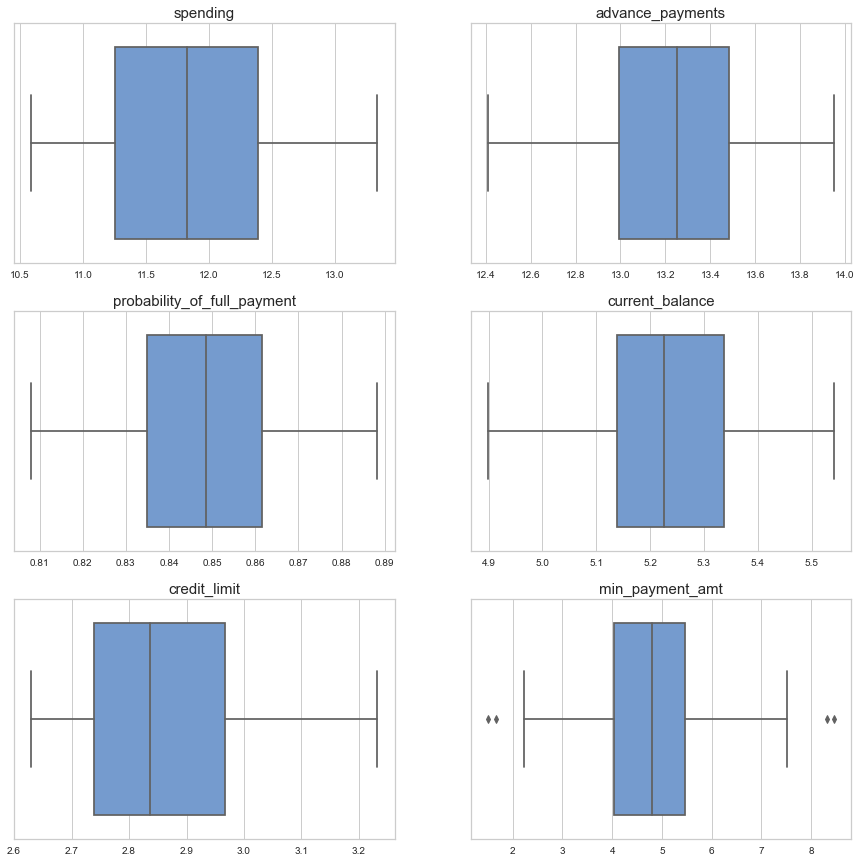

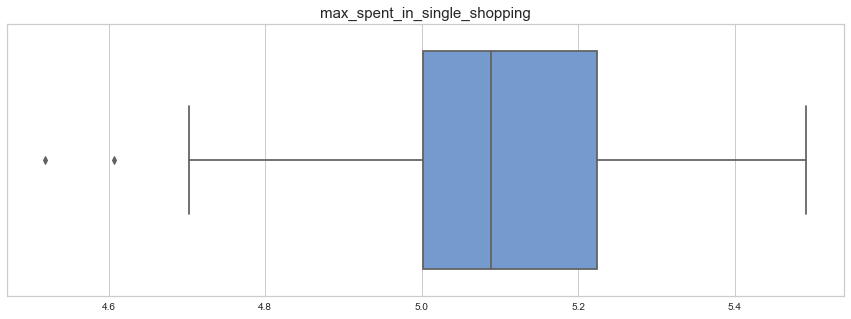

In [59]:
fig,axes = plt.subplots(nrows = 3,ncols = 2,figsize=[15,15])
for c,i in zip(cluster2.iloc[:,:-2].columns,axes.flatten()):
    sns.boxplot(cluster2[c],ax = i,color='#69d')
    i.set_title(c,fontsize=15)
    i.set_xlabel("")
    
plt.figure(figsize=[15,5])
sns.boxplot(cluster2['max_spent_in_single_shopping'],color='#69d')
plt.title('max_spent_in_single_shopping',fontsize=15)
plt.xlabel("")
plt.show()

In [60]:
stats2 = cluster2.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])
stats2.columns = col_names
stats2

spending (in 1000s)  advance_payments (in 100s)  \
count               72.000                      72.000   
mean                11.857                      13.248   
std                  0.715                       0.355   
min                 10.590                      12.410   
25%                 11.255                      12.992   
50%                 11.825                      13.250   
75%                 12.395                      13.483   
95%                 13.128                      13.802   
99%                 13.326                      13.943   
max                 13.340                      13.950   

       probability_of_full_payment  current_balance (in 1000s)  \
count                       72.000                      72.000   
mean                         0.848                       5.232   
std                          0.020                       0.142   
min                          0.808                       4.899   
25%                          0.835                       5.139   
50%                          0.849                       5.225   
75%                          0.861                       5.337   
95%                          0.882                       5.447   
99%                          0.888                       5.508   
max                          0.888                       5.541   

       credit_limit (in 10000s)  min_payment_amt (in 100s)  \
count                    72.000                     72.000   
mean                      2.850                      4.742   
std                       0.139                      1.355   
min                       2.630                      1.502   
25%                       2.738                      4.032   
50%                       2.837                      4.799   
75%                       2.967                      5.464   
95%                       3.073                      7.011   
99%                       3.157                      8.356   
max                       3.232                      8.456   

       max_spent_in_single_shopping (in 1000s)  
count                                   72.000  
mean                                     5.102  
std                                      0.184  
min                                      4.519  
25%                                      5.001  
50%                                      5.089  
75%                                      5.223  
95%                                      5.356  
99%                                      5.455  
max                                      5.491

### Cluster 3

_Filtering records from dataframe that are grouped in cluster 3_

In [61]:
cluster3 = market_kmeans[market_kmeans['Cluster']=='Cluster-3']
cluster3.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.940            16.920                        0.875            6.675   
2     18.950            16.420                        0.883            6.248   
4     17.990            15.860                        0.899            5.890   
8     18.170            16.260                        0.864            6.271   
10    18.550            16.220                        0.886            6.153   

    credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  
0          3.763            3.252                         6.550  Cluster-3  
2          3.755            3.368                         6.148  Cluster-3  
4          3.694            2.068                         5.837  Cluster-3  
8          3.512            2.853                         6.273  Cluster-3  
10         3.674            1.738                         5.894  Cluster-3

_Visualising cluster 3_

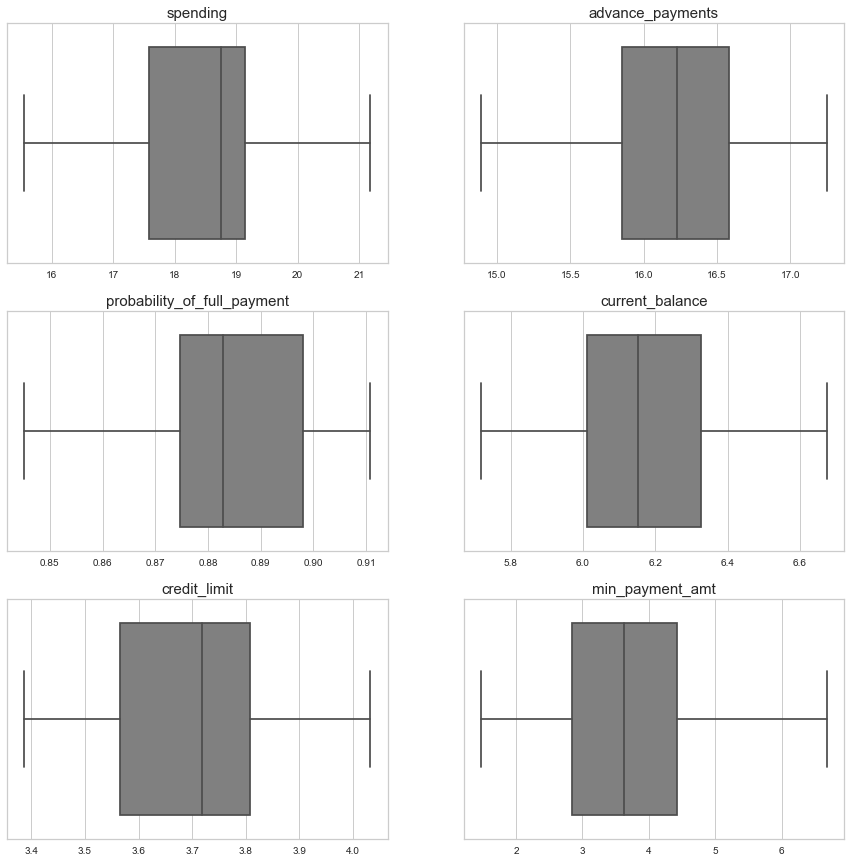

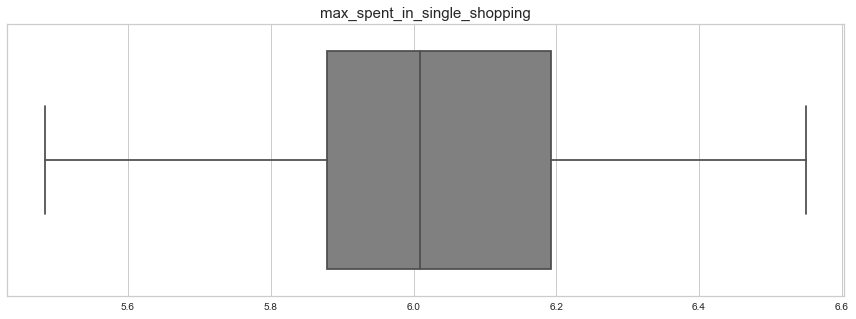

In [62]:
fig,axes = plt.subplots(nrows = 3,ncols = 2,figsize=[15,15])
for c,i in zip(cluster3.iloc[:,:-2].columns,axes.flatten()):
    sns.boxplot(cluster3[c],ax = i,color='grey')
    i.set_title(c,fontsize=15)
    i.set_xlabel("")
    
plt.figure(figsize=[15,5])
sns.boxplot(cluster3['max_spent_in_single_shopping'],color='grey')
plt.title('max_spent_in_single_shopping',fontsize=15)
plt.xlabel("")
plt.show()

In [63]:
stats3 = cluster3.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])
stats3.columns = col_names
stats3

spending (in 1000s)  advance_payments (in 100s)  \
count               67.000                      67.000   
mean                18.495                      16.203   
std                  1.277                       0.546   
min                 15.560                      14.890   
25%                 17.590                      15.855   
50%                 18.750                      16.230   
75%                 19.145                      16.580   
95%                 20.569                      17.044   
99%                 21.041                      17.237   
max                 21.180                      17.250   

       probability_of_full_payment  current_balance (in 1000s)  \
count                       67.000                      67.000   
mean                         0.884                       6.176   
std                          0.015                       0.238   
min                          0.845                       5.718   
25%                          0.875                       6.011   
50%                          0.883                       6.153   
75%                          0.898                       6.328   
95%                          0.908                       6.577   
99%                          0.909                       6.669   
max                          0.911                       6.675   

       credit_limit (in 10000s)  min_payment_amt (in 100s)  \
count                    67.000                     67.000   
mean                      3.698                      3.632   
std                       0.166                      1.211   
min                       3.387                      1.472   
25%                       3.565                      2.848   
50%                       3.719                      3.619   
75%                       3.808                      4.421   
95%                       3.952                      5.706   
99%                       4.032                      6.233   
max                       4.033                      6.682   

       max_spent_in_single_shopping (in 1000s)  
count                                   67.000  
mean                                     6.042  
std                                      0.230  
min                                      5.484  
25%                                      5.879  
50%                                      6.009  
75%                                      6.192  
95%                                      6.450  
99%                                      6.516  
max                                      6.550

_**Cluster profiling based on K-means Clustering**_

In [64]:
cluster_profiling(stats=stats1,cluster_no=1)

The average spending (in 1000s) for Cluster 1 customers is: 14.4379
50% of the customers have spending (in 1000s) of 14.43, 95% have of 16.13 and 99% have of 16.272.
Interquartile range for spending (in 1000s) is 29.08. IQR tells us the range of the middle half of the data.

The average advance_payments (in 100s) for Cluster 1 customers is: 14.3377
50% of the customers have advance_payments (in 100s) of 14.39, 95% have of 15.13 and 99% have of 15.256.
Interquartile range for advance_payments (in 100s) is 28.79. IQR tells us the range of the middle half of the data.

The average probability_of_full_payment for Cluster 1 customers is: 0.8816
50% of the customers have probability_of_full_payment of 0.8819, 95% have of 0.9054 and 99% have of 0.9162.
Interquartile range for probability_of_full_payment is 1.7646. IQR tells us the range of the middle half of the data.

The average current_balance (in 1000s) for Cluster 1 customers is: 5.5146
50% of the customers have current_balance (in 1000s

In [65]:
cluster_profiling(stats=stats2,cluster_no=2)

The average spending (in 1000s) for Cluster 2 customers is: 11.8569
50% of the customers have spending (in 1000s) of 11.825, 95% have of 13.1285 and 99% have of 13.3258.
Interquartile range for spending (in 1000s) is 23.65. IQR tells us the range of the middle half of the data.

The average advance_payments (in 100s) for Cluster 2 customers is: 13.2478
50% of the customers have advance_payments (in 100s) of 13.25, 95% have of 13.8015 and 99% have of 13.9429.
Interquartile range for advance_payments (in 100s) is 26.475. IQR tells us the range of the middle half of the data.

The average probability_of_full_payment for Cluster 2 customers is: 0.8483
50% of the customers have probability_of_full_payment of 0.8486, 95% have of 0.8815 and 99% have of 0.8877.
Interquartile range for probability_of_full_payment is 1.6965. IQR tells us the range of the middle half of the data.

The average current_balance (in 1000s) for Cluster 2 customers is: 5.2317
50% of the customers have current_balance (

In [66]:
cluster_profiling(stats=stats3,cluster_no=3)

The average spending (in 1000s) for Cluster 3 customers is: 18.4954
50% of the customers have spending (in 1000s) of 18.75, 95% have of 20.569 and 99% have of 21.0414.
Interquartile range for spending (in 1000s) is 36.735. IQR tells us the range of the middle half of the data.

The average advance_payments (in 100s) for Cluster 3 customers is: 16.2034
50% of the customers have advance_payments (in 100s) of 16.23, 95% have of 17.044 and 99% have of 17.2368.
Interquartile range for advance_payments (in 100s) is 32.435. IQR tells us the range of the middle half of the data.

The average probability_of_full_payment for Cluster 3 customers is: 0.8842
50% of the customers have probability_of_full_payment of 0.8829, 95% have of 0.9077 and 99% have of 0.909.
Interquartile range for probability_of_full_payment is 1.7727. IQR tells us the range of the middle half of the data.

The average current_balance (in 1000s) for Cluster 3 customers is: 6.1757
50% of the customers have current_balance (in 

_From the above inferences we can note that credit usage for customers in `Cluster 1` is average for `Cluster 2` is low and for `Cluster 3` is high._

In [67]:
market_kmeans['Credit Usage'] = market_kmeans['Cluster'].map({'Cluster-1':'Average','Cluster-2':'Low',
                                             'Cluster-3':'High'})
market_kmeans.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0    19.940            16.920                        0.875            6.675   
1    15.990            14.890                        0.906            5.363   
2    18.950            16.420                        0.883            6.248   
3    10.830            12.960                        0.810            5.278   
4    17.990            15.860                        0.899            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping    Cluster  \
0         3.763            3.252                         6.550  Cluster-3   
1         3.582            3.336                         5.144  Cluster-1   
2         3.755            3.368                         6.148  Cluster-3   
3         2.641            5.182                         5.185  Cluster-2   
4         3.694            2.068                         5.837  Cluster-3   

  Credit Usage  
0         High  
1      Average  
2         High  
3          Low  
4         High

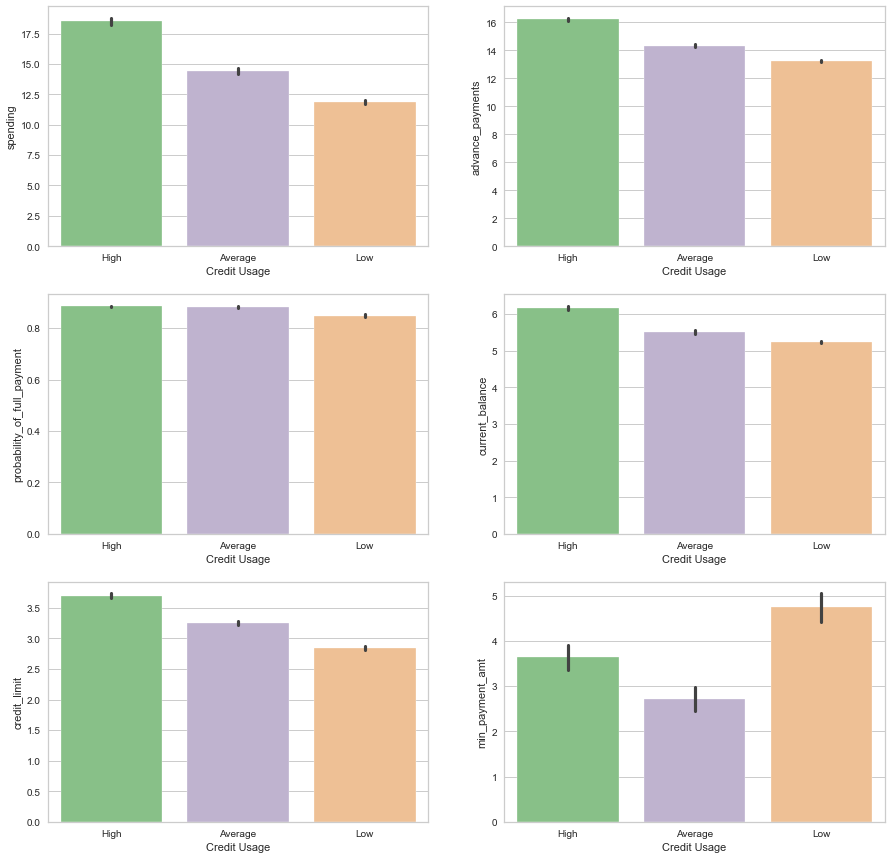

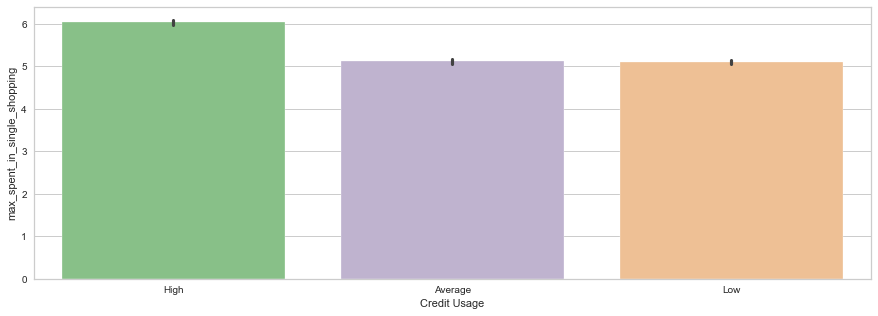

In [68]:
fig, axes = plt.subplots(3,2,figsize=[15,15])
sns.barplot(market_kmeans['Credit Usage'],market_kmeans['spending'],palette='Accent',ax=axes[0,0])
sns.barplot(market_kmeans['Credit Usage'],market_kmeans['advance_payments'],palette='Accent',ax=axes[0,1])
sns.barplot(market_kmeans['Credit Usage'],market_kmeans['probability_of_full_payment'],palette='Accent',ax=axes[1,0])
sns.barplot(market_kmeans['Credit Usage'],market_kmeans['current_balance'],palette='Accent',ax=axes[1,1])
sns.barplot(market_kmeans['Credit Usage'],market_kmeans['credit_limit'],palette='Accent',ax=axes[2,0])
sns.barplot(market_kmeans['Credit Usage'],market_kmeans['min_payment_amt'],palette='Accent',ax=axes[2,1])
plt.show()

plt.figure(figsize=[15,5])
sns.barplot(market_kmeans['Credit Usage'],market_kmeans['max_spent_in_single_shopping'],palette='Accent')
plt.show()

__1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.__<a class="anchor" id="section1.5"></a>

_**Customer Profile based on credit usage:**_

_**High:** Customers profiled as high credit usage have an average credit limit of 36,000 and average total spends of approx. 18,000. The maximum spend is around 6000 approx. on single shopping. The average probability that the customer ranking as high in credit usage will make a full payment is 0.8842 (88.42% likely to make full payment). ~ 31% of total customers are in this profile._

_**Average:** Customers profiled as average credit usage have an average credit limit of 32,000 and average total spends of approx. 14,000. The maximum spend is around 5000 approx. on single shopping. The average probability that the customer ranking as average in credit usage will make a full payment is 0.8816 (88.16% likely to make full payment). ~ 34% of total customers are in this profile._

_**Low:** Customers profiled as high credit usage have an average credit limit of 28,000 and average total spends of approx. 11,000. The maximum spend is around 5000 approx. on single shopping. The average probability that the customer ranking as low in credit usage will make a full payment is 0.8483 (84.83% likely to make full payment). ~ 33% of total customers are in this profile._

_**Promotional Strategies**_

+ _For the customers ranked in low credit use, the bank can provide discount or cash back promotions for each time a credit card bill is paid. This will increase the probability of the full payment and increase in loyalty with rewards in return. This strategy can be applicable for rest of the groups as well._

+ _The third-party marketing collaboration one of the examples where brand related credit cards such as Amazon pay cashback or Uber points can be more attractive to the customers for both with average and low credit use. Customers are likely to be loyal to a credit card provider by rewards and incentives._

+ _Particular credit card product for each user needs – for example platinum cards with high rewards for customers segmented in high credit use and promotional offers. EMI credit card or for the customers segmented in low credit usage which will promote them to purchase more and will likely to make full payment over the set period of time or Zero interest credit cards let cardholders skip paying an annual percentage rate on purchases, balance transfers or both for a set period of time. Promotional cards for the average users which provides discounts every month like 10% off on flights/food/gas or 0% intrest on annual fees._

+ _Personalized marketing emails/notifications for each user based on their recent promotional or offers availed. Bank can offer similar or same type of offers to the customers for all the segments._

+ _Attractive offers for loan, EMI or offering rewards once a while for a minimum amount spent over a period of time._

## 2. Problem 2: CART-RF-ANN<a class="anchor" id="problem2"></a>

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

__2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).__<a class="anchor" id="section2.1"></a>

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

In [69]:
insurance = pd.read_csv('insurance_part2_data.csv')
print("Data imported successfully!")
insurance.head()

Data imported successfully!


Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No      0.700  Online         7  2.510   
1   36         EPX  Travel Agency      No      0.000  Online        34 20.000   
2   39         CWT  Travel Agency      No      5.940  Online         3  9.900   
3   36         EPX  Travel Agency      No      0.000  Online         4 26.000   
4   33         JZI       Airlines      No      6.300  Online        53 18.000   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA

_**Performing inital steps:**_

In [70]:
initial_steps(df=insurance)

Structure of the dataset:
----------------------------------------------------------------------------------------------------

The dataset has 3000 rows and 10 columns.

Total elements in this dataset are 30000

Missing Values Check
----------------------------------------------------------------------------------------------------
There are no missing values in the dataset

Info of the dataset
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   S

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
63    30         C2B       Airlines     Yes     15.000  Online        27   
329   36         EPX  Travel Agency      No      0.000  Online         5   
407   36         EPX  Travel Agency      No      0.000  Online        11   
411   35         EPX  Travel Agency      No      0.000  Online         2   
422   36         EPX  Travel Agency      No      0.000  Online         5   
473   36         EPX  Travel Agency      No      0.000  Online        26   
524   36         EPX  Travel Agency      No      0.000  Online         3   
540   33         C2B       Airlines     Yes     54.000  Online       365   
567   36         EPX  Travel Agency      No      0.000  Online        19   
569   36         EPX  Travel Agency      No      0.000  Online        14   

      Sales       Product Name Destination  
63   60.000        Bronze Plan        ASIA  
329  20.000    Customised Plan        ASIA  
407  19.000  Cancellation Plan        ASIA  
411  20.000    Customised Plan        ASIA  
422  20.000    Customised Plan        ASIA  
473  24.000    Customised Plan        ASIA  
524  10.000  Cancellation Plan        ASIA  
540 216.000        Silver Plan        ASIA  
567  20.000    Customised Plan        ASIA  
569  20.000    Customised Plan        ASIA

_**Inferences**_

----
_The dataset has 3000 rows and 10 columns and total elements in this dataset are 30000. There are no missing values however there are 139 duplicate values. Based on our problem statement I've decided to keep the duplicate values as it might give us some insite on similarity of few cases and it's frequency._

_The data uses 234.5+ KB of the total memory. Age, Commision, Duration and Sales are the numerical variables in the dataset and Agency_Code, Type, Channel, Sales, Product Name and Destination are the categorical variables with Claimed being the target variable for our business problem._

----

_**Performing Univariate Analysis**_

_Let's divide the dataset columns into numerical and categorical:_

In [71]:
numerical = []
categorical = []
if len(insurance.describe().columns.to_list()) != 0 and len(insurance.describe(exclude=np.number).columns.to_list())==0:
    numerical = insurance.describe().columns.to_list()
elif len(insurance.describe(exclude=np.number).columns.to_list()) !=0 and len(insurance.describe().columns.to_list()) != 0:
    numerical = insurance.describe().columns.to_list()
    categorical = insurance.describe(exclude=np.number).columns.to_list()
elif len(insurance.describe(exclude=np.number).columns.to_list()) !=0 and len(insurance.describe().columns.to_list()) == 0:
    categorical = insurance.describe(exclude=np.number).columns.to_list()

    
stats_summary(df=insurance).T

This dataset has 4 numerical values and 6 categorical values! Perform statistical analysis for both!


count   mean     std    min    25%    50%    75%      max
Age       3000.000 38.091  10.464  8.000 32.000 36.000 42.000   84.000
Commision 3000.000 14.529  25.481  0.000  0.000  4.630 17.235  210.210
Duration  3000.000 70.001 134.053 -1.000 11.000 26.500 63.000 4580.000
Sales     3000.000 60.250  70.734  0.000 20.000 33.000 69.000  539.000

_Univariate analysis for numerical analysis_

In [72]:
uni_num(df=insurance,num_col=numerical)

Univariate Analysis for column: Age
----------------------------------------------------------------------------------------------------
Statistical Inferences
------------------------------------------------------------
count   3000.000
mean      38.091
std       10.464
min        8.000
25%       32.000
50%       36.000
75%       42.000
max       84.000
Name: Age, dtype: float64

Shapiro-Wilk test for normality
------------------------------------------------------------
pvalue for Age column is 0.0,
Hence we reject the null hypothesis that the data is normally distributed


Detecting outliers using z-score
------------------------------------------------------------
Age variable has outliers

Univariate Analysis for column: Commision
----------------------------------------------------------------------------------------------------
Statistical Inferences
------------------------------------------------------------
count   3000.000
mean      14.529
std       25.481
min        0.000
2

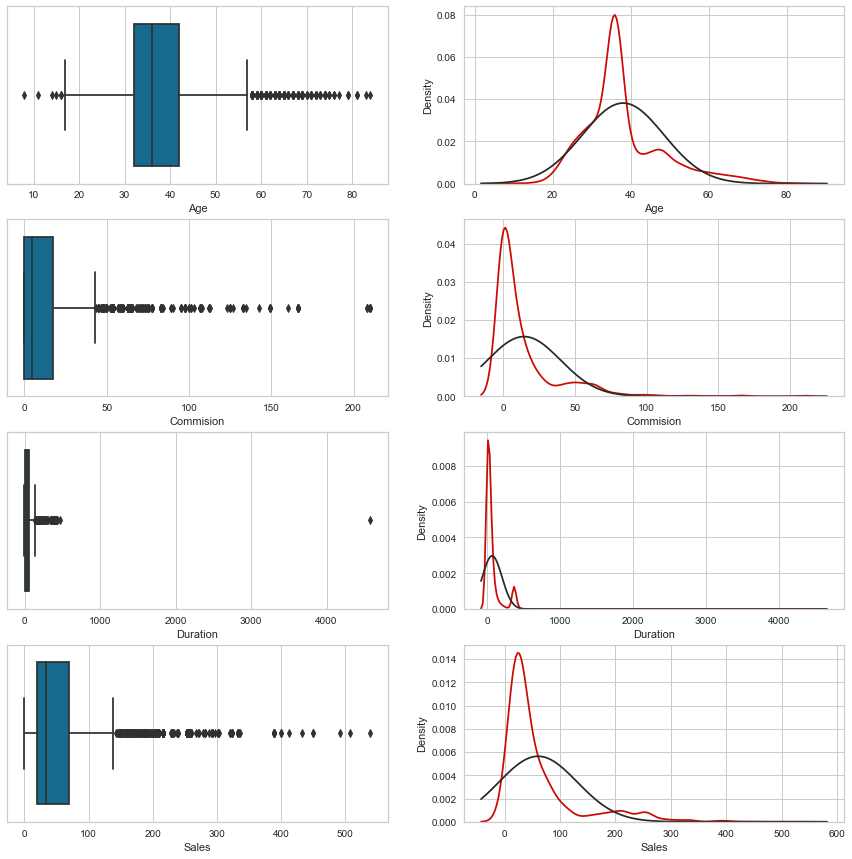

In [73]:
fig,axes = plt.subplots(4,2,figsize=[15,15])
age_box = sns.boxplot(insurance['Age'],ax=axes[0,0])
age_dist = sns.distplot(insurance['Age'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[0,1])
# age_box.set_xlabel('')

commision_box = sns.boxplot(insurance['Commision'],ax=axes[1,0])
commision_dist = sns.distplot(insurance['Commision'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[1,1])
# commision_box.set_xlabel('')

Duration_box = sns.boxplot(insurance['Duration'],ax=axes[2,0])
Duration_dist = sns.distplot(insurance['Duration'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[2,1])
# Duration_box.set_xlabel('')

Sales_box = sns.boxplot(insurance['Sales'],ax=axes[3,0])
Sales_dist = sns.distplot(insurance['Sales'],kde=True,hist=False,kde_kws={'color':'r'},fit=stats.norm,ax=axes[3,1])
# Sales_box.set_xlabel('')

_**Inferences**_

----


_Based on the descriptive statistics on numerical variables we see that the min Age of the person insured is 8 years and max age is 84 years. Highest commision earned is 210.210 and highest sales is 539._

_Based on **Shapiro-Wilks Test** the columns have outliers and as per the **z-score check** the variables in the data are not normally distributed._

_Univariate analysis for categorical variables_

In [74]:
insurance.describe(exclude=np.number)

Agency_Code           Type Claimed Channel     Product Name Destination
count         3000           3000    3000    3000             3000        3000
unique           4              2       2       2                5           3
top            EPX  Travel Agency      No  Online  Customised Plan        ASIA
freq          1365           1837    2076    2954             1136        2465

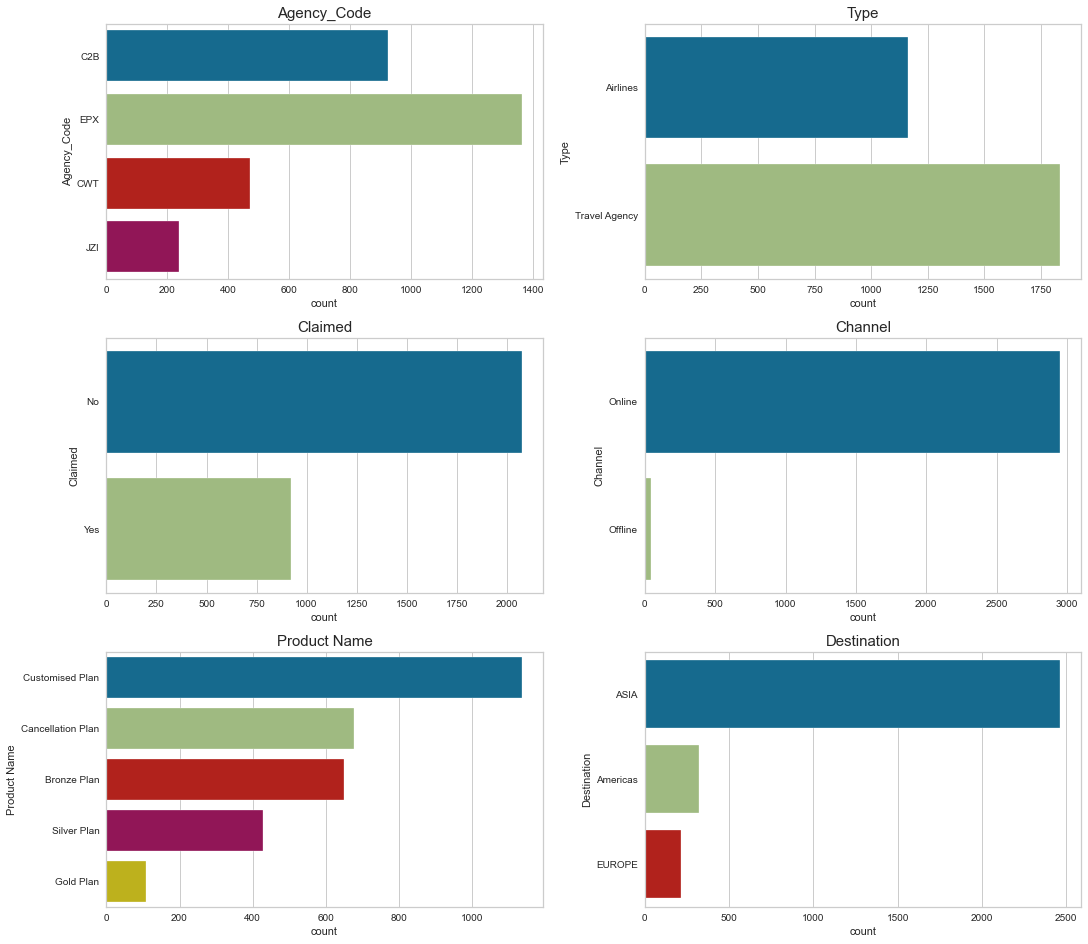

In [75]:
def uni_cat(df,cat_col):
    fig,axes = plt.subplots(3,2,figsize=[15,13],constrained_layout = True)
    for c, i in zip(cat_col,axes.flatten()):
        sns.countplot(y=df[c],ax=i)
        i.set_title(c,fontsize=15)
uni_cat(df=insurance,cat_col=categorical)

_**Inferences**_

----

+ _Out off 4 unique values in `Agency_Code` the top agency code is **EPX** with frequency of 1365._


+ _Out off 2 unique values in `Type` the type with highest frequency is **Travel Agency** with frequency of 1837._


+ _Out off 2 unique values in `Claimed` the highest claimed is **No** with frequency of 2076._


+ _Out off 2 unique values in `Channel` the channel with highest frequency is **Online** with frequency of 2954._


+ _Out off 5 unique values in `Product Name` the highest frequented product is **Customised Plan** with frequency of 1136._


+ _Out off 3 unique values in `Destination` the one highest frequented is **ASIA** with frequency of 2465._

_**Performing Bivariate Analysis**_

_Numerical vs Numerical_

Relation between variables based on claimed status


<Figure size 1440x720 with 0 Axes>

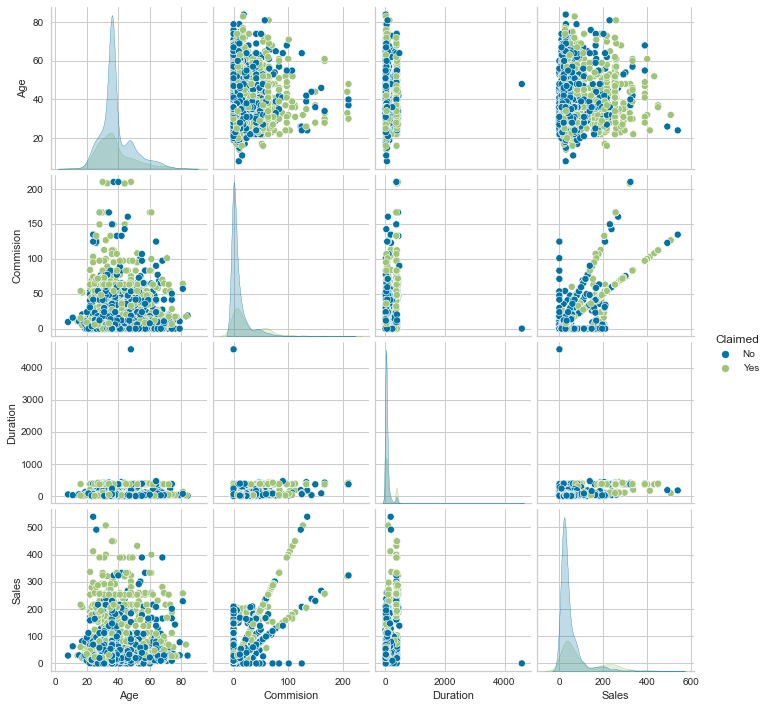

In [76]:
print(color.BOLD+'Relation between variables based on claimed status'+color.END)

plt.figure(figsize=[20,10])
sns.pairplot(data=insurance,hue='Claimed')
plt.show()

_**Inferences**_

----

_Only visible correlation between the data can be seen in `Commision` and `Sales` column._

_Categorical vs Categorical_

In [77]:
products =  pd.crosstab(insurance['Product Name'],insurance['Claimed'])
agency = pd.crosstab(insurance['Agency_Code'],insurance['Claimed'])
types = pd.crosstab(insurance['Type'],insurance['Claimed'])
channel = pd.crosstab(insurance['Channel'],insurance['Claimed'])
destination = pd.crosstab(insurance['Destination'],insurance['Claimed'])

from plotly.graph_objs import *

# Use textposition='auto' for direct text
figa = px.bar(products,barmode='group',title='Products and Claimed Status',color_discrete_sequence=['darkcyan','lightsteelblue'])
figb = px.bar(agency,barmode='group',title='Agency code and Claimed Status',color_discrete_sequence=['darkcyan','lightsteelblue'])
figc = px.bar(types,barmode='group',title='Type and Claimed Status',color_discrete_sequence=['darkcyan','lightsteelblue'])
figd = px.bar(channel,barmode='group',title='Channel and Claimed Status',color_discrete_sequence=['darkcyan','lightsteelblue'])
fige = px.bar(destination,barmode='group',title='Destination and Claimed Status',color_discrete_sequence=['darkcyan','lightsteelblue'])

figa.show()
figb.show()
figc.show()
figd.show()
fige.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

_**Inferences**_

----


+ _**Customised Plan** has the highest value with no claims. **Gold and Silver Plan** have more claims than rest of the plans._


+ _**EPX agency code** has highest number of records with no claims. **CWT** and **JZI** have more claims than rest of the agencies._


+ _**Airlines seems** to have more or less a balanced claim status compared to Travel Agencies. **Travel Agencies** have high records of no claims._


+ _**Online channel** is more dominant than the offline channel. Online channels have high records of no claims as well._


+ _**Asia** is the most popular destination compared to Americas and Europe. All the three destinations have no claims more than yes._

_**Multivariate Analysis**_

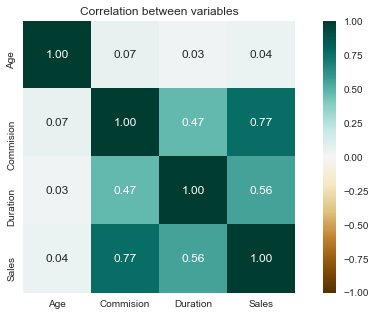

In [78]:
plt.figure(figsize=[10,5])
sns.heatmap(insurance.corr(),annot=True,fmt='.2f',cmap='BrBG',vmin=-1,vmax=1,square=True)
plt.title("Correlation between variables");

_**Inferences**_

----

+ Variable Age has no correlation with any of the other numerical variables.


+ Sales, Commision and Duration are all positively correlated to each other. 

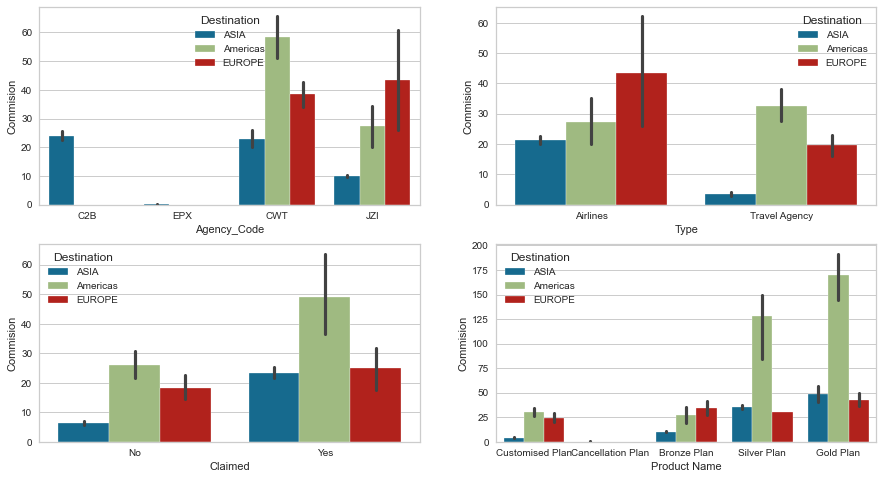

In [79]:
fig, axes = plt.subplots(2,2,figsize=[15,8])
sns.barplot(data=insurance,x='Agency_Code',y='Commision',hue='Destination',ax=axes[0,0])
sns.barplot(data=insurance,x='Type',y='Commision',hue='Destination',ax=axes[0,1])
sns.barplot(data=insurance,x='Claimed',y='Commision',hue='Destination',ax=axes[1,0])
sns.barplot(data=insurance,x='Product Name',y='Commision',hue='Destination',ax=axes[1,1]);

+ _Highest commission is received is from CWT agency code with Americas destination._

+ _Americas destination has highest commisions with yes claims followed by Europe._

+ _Airlines commissions are high in the type of tour insurance firms. Though the travel agencies rank high with the Americas tour destination._

+ _Silver Plan and the Gold Plan are have high commissions compared to other plans._

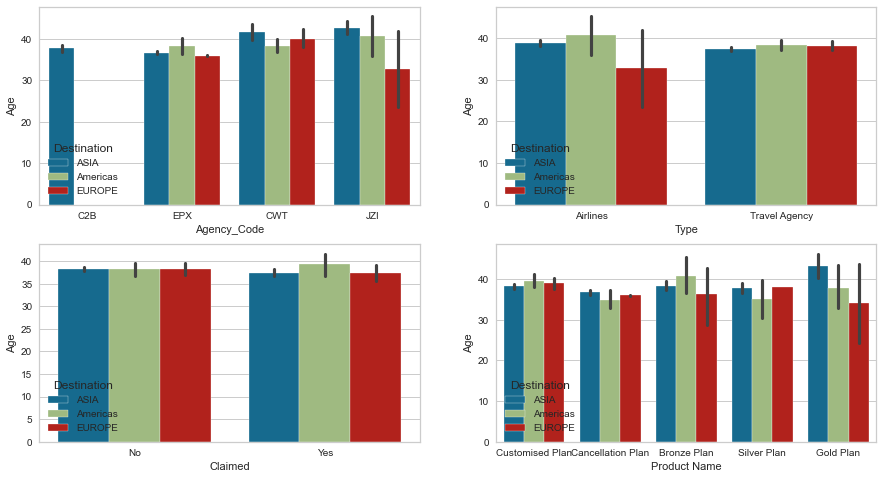

In [80]:
fig, axes = plt.subplots(2,2,figsize=[15,8])
sns.barplot(data=insurance,x='Agency_Code',y='Age',hue='Destination',ax=axes[0,0])
sns.barplot(data=insurance,x='Type',y='Age',hue='Destination',ax=axes[0,1])
sns.barplot(data=insurance,x='Claimed',y='Age',hue='Destination',ax=axes[1,0])
sns.barplot(data=insurance,x='Product Name',y='Age',hue='Destination',ax=axes[1,1]);

•	Asia destination and CWT and JZI agency have most of the insured in age group of 40 above. 


•	All the insured are above age of 30. Most claims are from America destination and ages above 35.


•	Age group of 30-35 prefer cancelation plan. Insured in age group of 40 prefer Gold Plan.

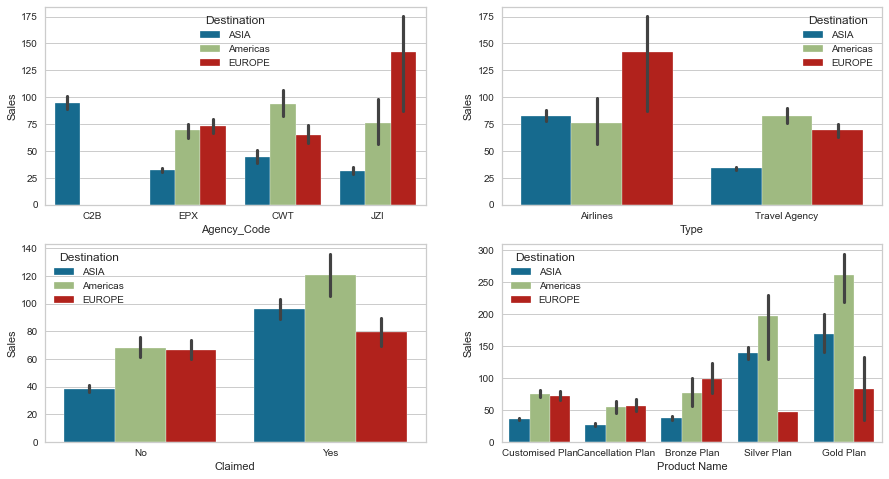

In [81]:
fig, axes = plt.subplots(2,2,figsize=[15,8])
sns.barplot(data=insurance,x='Agency_Code',y='Sales',hue='Destination',ax=axes[0,0])
sns.barplot(data=insurance,x='Type',y='Sales',hue='Destination',ax=axes[0,1])
sns.barplot(data=insurance,x='Claimed',y='Sales',hue='Destination',ax=axes[1,0])
sns.barplot(data=insurance,x='Product Name',y='Sales',hue='Destination',ax=axes[1,1]);

•	Overall sales are highest in JZI agency code with Europe destination. Sales with Europe destination is high in airlines tourist firms. 


•	Most of the claims are as we have seen is high in America destination though sales are also high.


•	Highest sales generating plans are Gold and Silver.

__2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest,Artificial Neural Network__<a class="anchor" id="section2.2"></a>

_Converting features in insurance columns to binary/multiclass_

In [82]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insurance[feature].unique()))
        print(pd.Categorical(insurance[feature].unique()).codes)
        insurance[feature] = pd.Categorical(insurance[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


_Scaling of the data_

In [83]:
insurance_scaled = insurance.copy() 

In [84]:
scaled_df = standard_scaler.fit_transform(insurance)
insurance_scaled = pd.DataFrame(scaled_df, index=insurance_scaled.index, columns=insurance_scaled.columns)
insurance_scaled.head()

Age  Agency_Code   Type  Claimed  Commision  Channel  Duration  Sales  \
0  0.947       -1.314 -1.257   -0.667     -0.543    0.125    -0.470 -0.816   
1 -0.200        0.698  0.796   -0.667     -0.570    0.125    -0.269 -0.569   
2  0.087       -0.308  0.796   -0.667     -0.337    0.125    -0.500 -0.712   
3 -0.200        0.698  0.796   -0.667     -0.570    0.125    -0.492 -0.484   
4 -0.487        1.704 -1.257   -0.667     -0.323    0.125    -0.127 -0.597   

   Product Name  Destination  
0         0.269       -0.435  
1         0.269       -0.435  
2         0.269        1.304  
3        -0.526       -0.435  
4        -1.320       -0.435

_Splitting data into train/test_

In [85]:
X = insurance.drop("Claimed" , axis=1)

y = insurance.pop("Claimed")

In [86]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30,random_state=0)

<IPython.core.display.Javascript object>

In [87]:
print('Dimensions for X_train =',X_train.shape)
print('Dimensions for X_test =',X_test.shape)
print('Dimensions for train_labels =',train_labels.shape)
print('Dimensions for test_labels =',test_labels.shape)
print('Total Observation =',X_train.shape[0]+X_test.shape[0])

Dimensions for X_train = (2100, 9)
Dimensions for X_test = (900, 9)
Dimensions for train_labels = (2100,)
Dimensions for test_labels = (900,)
Total Observation = 3000


_**Building Decision Tree Classification Model**_

_Search for best parameters_

In [88]:
param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)
CART = grid_search.fit(X_train, train_labels)

In [89]:
CART.best_params_

{'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 75}

In [90]:
cart_model = CART.best_estimator_

In [91]:
ytrain_predict = cart_model.predict(X_train)
ytest_predict = cart_model.predict(X_test)

In [92]:
CART_train =  (classification_report(train_labels,ytrain_predict))

CART_test = (classification_report(test_labels,ytest_predict))

In [93]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, roc_auc_score

Accuracy = accuracy_score(train_labels,ytrain_predict)
Recall = recall_score(train_labels,ytrain_predict)
Precision = precision_score(train_labels,ytrain_predict)
AUC_ROC_score = roc_auc_score(train_labels,ytrain_predict)
f1_Score = f1_score(train_labels,ytrain_predict)

print('Accuracy for train dataset = ',Accuracy)
print('Recall for train dataset = ',Recall)
print('Precision for train dataset = ',Precision)
print('AUC_ROC_score for train dataset = ',AUC_ROC_score)
print('f1_score for train dataset = ',f1_Score)

Accuracy = accuracy_score(test_labels,ytest_predict)
Recall = recall_score(test_labels,ytest_predict)
Precision = precision_score(test_labels,ytest_predict)
AUC_ROC_score = roc_auc_score(test_labels,ytest_predict)
f1_Score = f1_score(test_labels,ytest_predict)
print()
print('Accuracy for test dataset = ',Accuracy)
print('Recall for test dataset = ',Recall)
print('Precision for test dataset = ',Precision)
print('AUC_ROC_score for test dataset = ',AUC_ROC_score)
print('f1_score for test dataset = ',f1_Score)

Accuracy for train dataset =  0.7880952380952381
Recall for train dataset =  0.5723270440251572
Precision for train dataset =  0.6778398510242085
AUC_ROC_score for train dataset =  0.7270788225590267
f1_score for train dataset =  0.620630861040068

Accuracy for test dataset =  0.78
Recall for test dataset =  0.5347222222222222
Precision for test dataset =  0.7064220183486238
AUC_ROC_score for test dataset =  0.7150735294117647
f1_score for test dataset =  0.608695652173913


_**Building Random Forest Classification Model**_

_Search for best parameters_

In [96]:
param_grid = {
    'max_depth': [7, 8],
    'max_features': [7,8,9],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

RF = grid_search.fit(X_train, train_labels)

RF.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 75,
 'n_estimators': 101}

In [97]:
RF_model = RF.best_estimator_

In [98]:
ytrain_predict = RF_model.predict(X_train)
ytest_predict = RF_model.predict(X_test)

In [99]:
RF_train = (classification_report(train_labels,ytrain_predict))

RF_test = (classification_report(test_labels,ytest_predict))

In [100]:
Accuracy = accuracy_score(train_labels,ytrain_predict)
Recall = recall_score(train_labels,ytrain_predict)
Precision = precision_score(train_labels,ytrain_predict)
AUC_ROC_score = roc_auc_score(train_labels,ytrain_predict)
f1_Score = f1_score(train_labels,ytrain_predict)

print('Accuracy for train dataset = ',Accuracy)
print('Recall for train dataset = ',Recall)
print('Precision for train dataset = ',Precision)
print('AUC_ROC_score for train dataset = ',AUC_ROC_score)
print('f1_score for train dataset = ',f1_Score)

Accuracy = accuracy_score(test_labels,ytest_predict)
Recall = recall_score(test_labels,ytest_predict)
Precision = precision_score(test_labels,ytest_predict)
AUC_ROC_score = roc_auc_score(test_labels,ytest_predict)
f1_Score = f1_score(test_labels,ytest_predict)
print()
print('Accuracy for test dataset = ',Accuracy)
print('Recall for test dataset = ',Recall)
print('Precision for test dataset = ',Precision)
print('AUC_ROC_score for test dataset = ',AUC_ROC_score)
print('f1_score for test dataset = ',f1_Score)

Accuracy for train dataset =  0.7966666666666666
Recall for train dataset =  0.6022012578616353
Precision for train dataset =  0.6876122082585279
AUC_ROC_score for train dataset =  0.7416743994226208
f1_score for train dataset =  0.6420787929589272

Accuracy for test dataset =  0.7977777777777778
Recall for test dataset =  0.5798611111111112
Precision for test dataset =  0.7324561403508771
AUC_ROC_score for test dataset =  0.740093954248366
f1_score for test dataset =  0.6472868217054264


In [101]:
ytest_predict

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

_**Building Artificial Neural Network Classification Model**_

_Search for best parameters_

In [102]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

ann = MLPClassifier(random_state=0)

grid_search = GridSearchCV(estimator = ann, param_grid = param_grid, cv = 3)
ANN = grid_search.fit(X_train, train_labels)
ANN.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [103]:
ANN_model = ANN.best_estimator_
ytrain_predict = ANN_model.predict(X_train)
ytest_predict = ANN_model.predict(X_test)

In [104]:
ANN_train = (classification_report(train_labels,ytrain_predict))

ANN_test = (classification_report(test_labels,ytest_predict))

In [105]:
Accuracy = accuracy_score(train_labels,ytrain_predict)
Recall = recall_score(train_labels,ytrain_predict)
Precision = precision_score(train_labels,ytrain_predict)
AUC_ROC_score = roc_auc_score(train_labels,ytrain_predict)
f1_Score = f1_score(train_labels,ytrain_predict)

print('Accuracy for train dataset = ',Accuracy)
print('Recall for train dataset = ',Recall)
print('Precision for train dataset = ',Precision)
print('AUC_ROC_score for train dataset = ',AUC_ROC_score)
print('f1_score for train dataset = ',f1_Score)

Accuracy = accuracy_score(test_labels,ytest_predict)
Recall = recall_score(test_labels,ytest_predict)
Precision = precision_score(test_labels,ytest_predict)
AUC_ROC_score = roc_auc_score(test_labels,ytest_predict)
f1_Score = f1_score(test_labels,ytest_predict)
print()
print('Accuracy for test dataset = ',Accuracy)
print('Recall for test dataset = ',Recall)
print('Precision for test dataset = ',Precision)
print('AUC_ROC_score for test dataset = ',AUC_ROC_score)
print('f1_score for test dataset = ',f1_Score)

Accuracy for train dataset =  0.7795238095238095
Recall for train dataset =  0.47327044025157233
Precision for train dataset =  0.7016317016317016
AUC_ROC_score for train dataset =  0.6929193731312507
f1_score for train dataset =  0.5652582159624414

Accuracy for test dataset =  0.78
Recall for test dataset =  0.4513888888888889
Precision for test dataset =  0.7647058823529411
AUC_ROC_score for test dataset =  0.6930147058823529
f1_score for test dataset =  0.5676855895196506


In [106]:
ytest_predict

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

__2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.__<a class="anchor" id="section2.3"></a>

_**Performance Check**_

_**Decision Tree**_

_Classification Reports_

In [107]:
print(color.BOLD+'Performance Metrics: Train'+color.END)
print(CART_train)

Performance Metrics: Train
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1464
           1       0.68      0.57      0.62       636

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



_Confusion Matrix - train data_

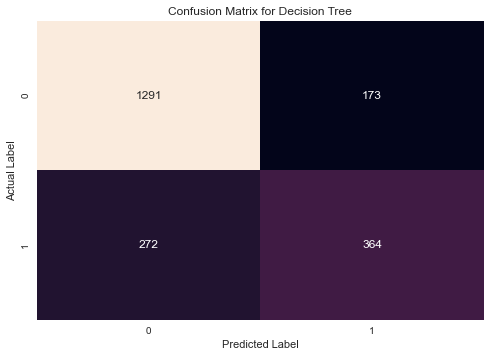

In [108]:
sns.heatmap(confusion_matrix(train_labels,cart_model.predict(X_train)),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format('Decision Tree'))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

_ROC and AUC Curve - on training data_

AUC : 0.837


Text(0.5, 1.0, 'ROC-Curve Train data -Decision Tree')

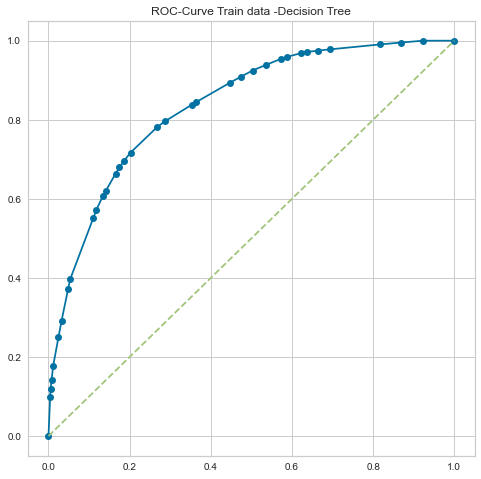

In [109]:
fig,axes = plt.subplots(figsize=(8,8))
probs = cart_model.predict_proba(X_train)[:,1]
auc = roc_auc_score(train_labels,probs)
print('AUC : {:.3f}'.format(auc))
fpr,tpr,thresholds = roc_curve(train_labels,probs)
roc_data = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Cutoffs':thresholds})
roc_data
plt.plot(roc_data['FPR'],roc_data['TPR'],marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
axes.set_title( 'ROC-Curve Train data -Decision Tree')

In [110]:
print(color.BOLD+'Performance Metrics: Test'+color.END)
print(CART_test)

Performance Metrics: Test
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       612
           1       0.71      0.53      0.61       288

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



_Confusion Matrix - test data_

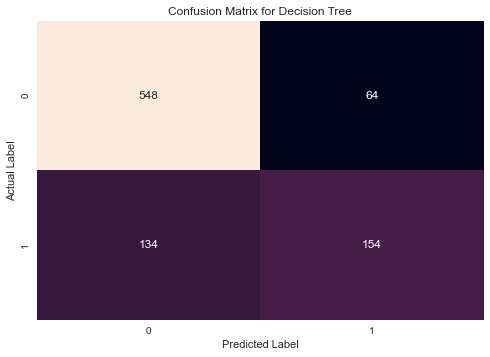

In [111]:
sns.heatmap(confusion_matrix(test_labels,cart_model.predict(X_test)),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format('Decision Tree'))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

_ROC and AUC Curve - on test data_

AUC : 0.817


Text(0.5, 1.0, 'ROC-Curve Test data')

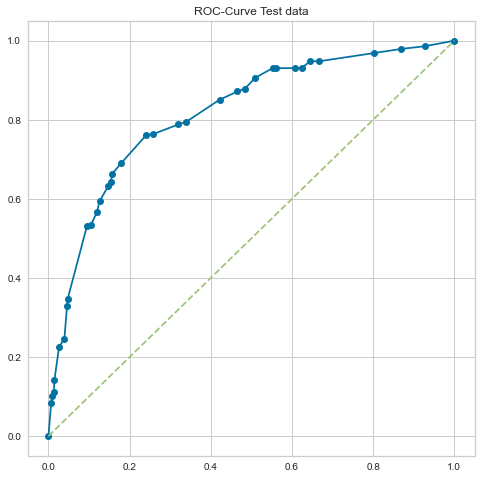

In [112]:
fig,axes = plt.subplots(figsize=(8,8))
probs = cart_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(test_labels,probs)
print('AUC : {:.3f}'.format(auc))
fpr,tpr,thresholds = roc_curve(test_labels,probs)
roc_data = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Cutoffs':thresholds})
roc_data
plt.plot(roc_data['FPR'],roc_data['TPR'],marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
axes.set_title( 'ROC-Curve Test data')


Accuracy for train dataset =  0.7880952380952381

Recall for train dataset =  0.5723270440251572

Precision for train dataset =  0.6778398510242085

AUC_ROC_score for train dataset =  0.7270788225590267

f1_score for train dataset =  0.620630861040068

------

Accuracy for test dataset =  0.78

Recall for test dataset =  0.5347222222222222

Precision for test dataset =  0.7064220183486238

AUC_ROC_score for test dataset =  0.7150735294117647

f1_score for test dataset =  0.608695652173913

_Accuracy of the model for train and test dataset are 0.79 and 0.78 respectively.  Recall for train and test data set is 0.57 and 0.53 respectively which represents the model’s ability to classify all the positive samples with the precision of 0.68 in train dataset and 0.71 in test dataset. Based on the AUC_ROC score for train and test dataset which is 0.73 and 0.72 respectively, the model has a good sense to separate and distinguish between the classes. F1 score (harmonic mean of precision and recall) for train dataset is 0.62 and for test dataset is 0.61._


_**Random Forest**_

_Classification Reports_

In [113]:
print(color.BOLD+'Performance Metrics: Train'+color.END)
print(RF_train)

Performance Metrics: Train
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1464
           1       0.69      0.60      0.64       636

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



_Confusion Matrix - train data_

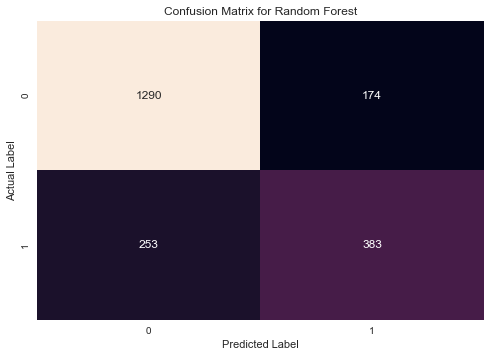

In [114]:
sns.heatmap(confusion_matrix(train_labels,RF_model.predict(X_train)),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format('Random Forest'))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

_ROC and AUC Curve - on training data_

AUC : 0.846


Text(0.5, 1.0, 'ROC-Curve Train data -Random Forest')

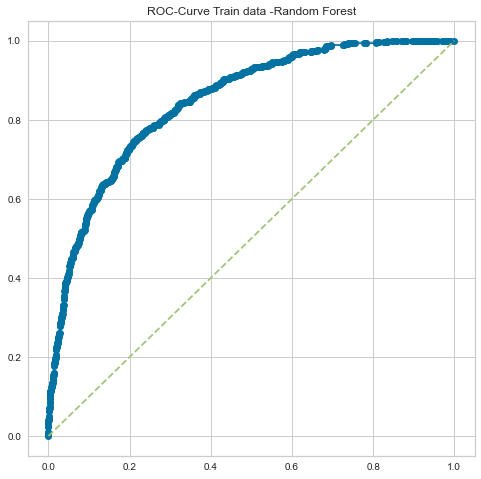

In [115]:
fig,axes = plt.subplots(figsize=(8,8))
probs = RF_model.predict_proba(X_train)[:,1]
auc = roc_auc_score(train_labels,probs)
print('AUC : {:.3f}'.format(auc))
fpr,tpr,thresholds = roc_curve(train_labels,probs)
roc_data = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Cutoffs':thresholds})
roc_data
plt.plot(roc_data['FPR'],roc_data['TPR'],marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
axes.set_title( 'ROC-Curve Train data -Random Forest')

In [116]:
print(color.BOLD+'Performance Metrics: Test'+color.END)
print(RF_test)

Performance Metrics: Test
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       612
           1       0.73      0.58      0.65       288

    accuracy                           0.80       900
   macro avg       0.78      0.74      0.75       900
weighted avg       0.79      0.80      0.79       900



_Confusion Matrix - test data_

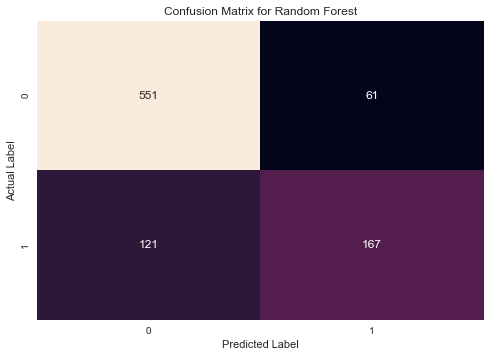

In [117]:
sns.heatmap(confusion_matrix(test_labels,RF_model.predict(X_test)),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format('Random Forest'))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

_ROC and AUC Curve - on test data_

AUC : 0.842


Text(0.5, 1.0, 'ROC-Curve Test data')

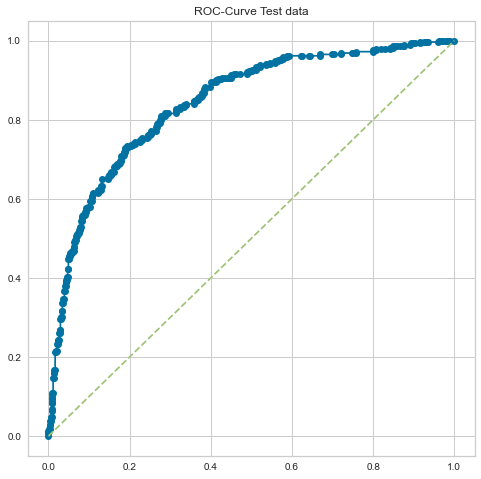

In [118]:
fig,axes = plt.subplots(figsize=(8,8))
probs = RF_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(test_labels,probs)
print('AUC : {:.3f}'.format(auc))
fpr,tpr,thresholds = roc_curve(test_labels,probs)
roc_data = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Cutoffs':thresholds})
roc_data
plt.plot(roc_data['FPR'],roc_data['TPR'],marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
axes.set_title( 'ROC-Curve Test data')

Accuracy for train dataset =  0.7966666666666666

Recall for train dataset =  0.6022012578616353

Precision for train dataset =  0.6876122082585279

AUC_ROC_score for train dataset =  0.7416743994226208

f1_score for train dataset =  0.6420787929589272

----------

Accuracy for test dataset =  0.7977777777777778

Recall for test dataset =  0.5798611111111112

Precision for test dataset =  0.7324561403508771

AUC_ROC_score for test dataset =  0.740093954248366

f1_score for test dataset =  0.6472868217054264

_Accuracy of the model for train and test dataset are 0.796 and 0.797 respectively.  Recall for train and test data set is 0.60 and 0.58 respectively which represents the model’s ability to classify all the positive samples with the precision of 0.69 in train dataset and 0.73 in test dataset. Based on the AUC_ROC score for train and test dataset which is 0.741 and 0.74 respectively, the model has a good sense to separate and distinguish between the classes. F1 score (harmonic mean of precision and recall) for train dataset is 0.642 and for test dataset is 0.647._


_**Artificial Neural Networks**_

_Classification Reports_

In [119]:
print(color.BOLD+'Performance Metrics: Train'+color.END)
print(ANN_train)

Performance Metrics: Train
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1464
           1       0.70      0.47      0.57       636

    accuracy                           0.78      2100
   macro avg       0.75      0.69      0.71      2100
weighted avg       0.77      0.78      0.77      2100



_Confusion Matrix - train data_

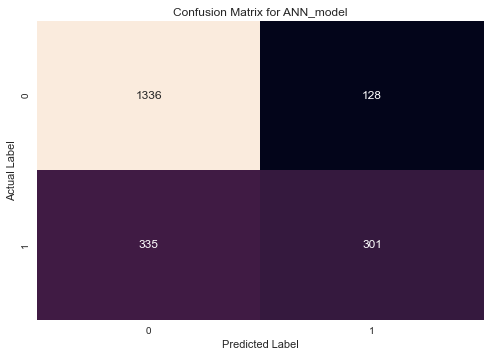

In [120]:
sns.heatmap(confusion_matrix(train_labels,ANN_model.predict(X_train)),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format('ANN_model'))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

_ROC and AUC Curve - on training data_

AUC : 0.806


Text(0.5, 1.0, 'ROC-Curve Train data -ANN_model')

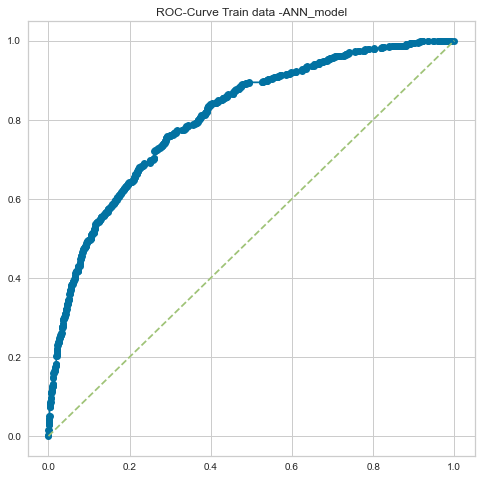

In [121]:
fig,axes = plt.subplots(figsize=(8,8))
probs = ANN_model.predict_proba(X_train)[:,1]
auc = roc_auc_score(train_labels,probs)
print('AUC : {:.3f}'.format(auc))
fpr,tpr,thresholds = roc_curve(train_labels,probs)
roc_data = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Cutoffs':thresholds})
roc_data
plt.plot(roc_data['FPR'],roc_data['TPR'],marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
axes.set_title( 'ROC-Curve Train data -ANN_model')

In [122]:
print(color.BOLD+'Performance Metrics: Test'+color.END)
print(ANN_test)

Performance Metrics: Test
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       612
           1       0.76      0.45      0.57       288

    accuracy                           0.78       900
   macro avg       0.77      0.69      0.71       900
weighted avg       0.78      0.78      0.76       900



_Confusion Matrix - test data_

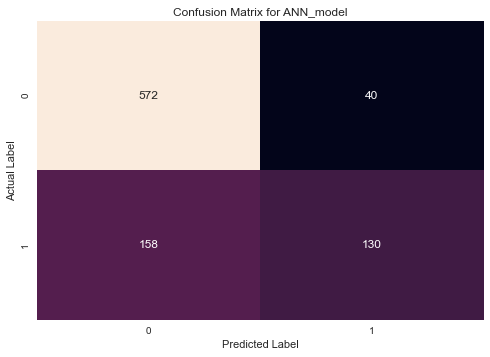

In [123]:
sns.heatmap(confusion_matrix(test_labels,ANN_model.predict(X_test)),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for {}'.format('ANN_model'))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

_ROC and AUC Curve - on test data_

AUC : 0.814


Text(0.5, 1.0, 'ROC-Curve Test data')

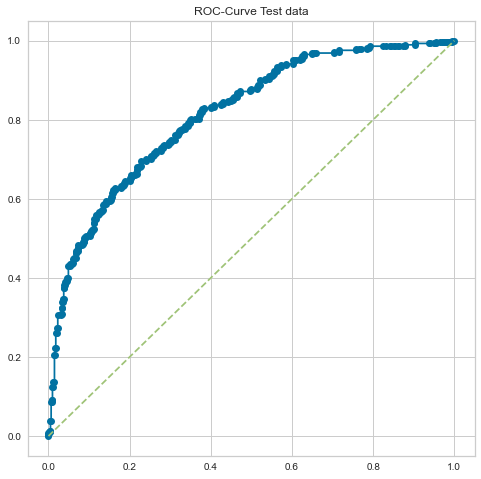

In [124]:
fig,axes = plt.subplots(figsize=(8,8))
probs = ANN_model.predict_proba(X_test)[:,1]
auc = roc_auc_score(test_labels,probs)
print('AUC : {:.3f}'.format(auc))
fpr,tpr,thresholds = roc_curve(test_labels,probs)
roc_data = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Cutoffs':thresholds})
roc_data
plt.plot(roc_data['FPR'],roc_data['TPR'],marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
axes.set_title( 'ROC-Curve Test data')

Accuracy for train dataset =  0.7795238095238095

Recall for train dataset =  0.47327044025157233

Precision for train dataset =  0.7016317016317016

AUC_ROC_score for train dataset =  0.6929193731312507

f1_score for train dataset =  0.5652582159624414

--------

Accuracy for test dataset =  0.78

Recall for test dataset =  0.4513888888888889

Precision for test dataset =  0.7647058823529411

AUC_ROC_score for test dataset =  0.6930147058823529

f1_score for test dataset =  0.5676855895196506

_Accuracy of the model for train and test dataset are 0.779 and 0.78 respectively. Recall for train and test data set is 0.47 and 0.45 respectively which represents the model’s ability to classify all the positive samples with the precision of 0.70 in train dataset and 0.76 in test dataset. Based on the AUC_ROC score for train and test dataset which is 0.692 and 0.693 respectively, the model has a good sense to separate and distinguish between the classes. F1 score (harmonic mean of precision and recall) for train dataset is 0.565 and for test dataset is 0.567._


_Recall and Precision are important as it reflects model’s ability to identify the positive records with accuracy and f1-score is the harmonic mean of recall and precision._
_High recall indicates that many of the data were predicted and high relevant data were selected. Other high value of f1-score shows that best result values are obtained at the precision and recall performance measures._


__2.4 Final Model: Compare all the models and write an inference which model is best/optimized.__<a class="anchor" id="section2.4"></a>

_ROC and AUC Curve_

In [125]:
models_names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'ANN']

Area under the curve for Decision Tree Classification Model is 0.8174785539215688
Area under the curve for Random Forest Classification Model is 0.8423911810094408
Area under the curve for Artificial Neural Network Model is 0.8140971087509078


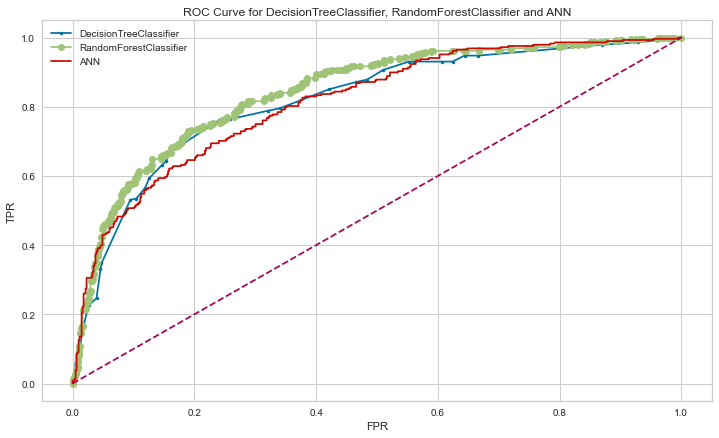

In [126]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(test_labels,cart_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels,RF_model.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(test_labels,ANN_model.predict_proba(X_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(test_labels, cart_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(test_labels, RF_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels, ANN_model.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names)
plt.show()

<h6 align=center>Performance Matrix on Training data:</h6>


| Algorithm | Accuracy | Recall | Precision | AUC_ROC Score | f1-score |
|-----------|-----------|-----------|-----------|-----------|-----------|
|Decision Tree | 0.79 | 0.57 | 0.67 | 0.72 | 0.62 |
|Random Forest | 0.80 | 0.61 | 0.69 | 0.74 | 0.64 |
|Artificial Neural Network | 0.78 | 0.47 | 0.71 | 0.69 | 0.57 |

<h6 align=center>Performance Matrix on Testing data:</h6>


| Algorithm | Accuracy | Recall | Precision | AUC_ROC Score | f1-score |
|-----------|-----------|-----------|-----------|-----------|-----------|
|Decision Tree | 0.78 | 0.53 | 0.71 | 0.72 | 0.61 |
|Random Forest | 0.80 | 0.58 | 0.73 | 0.74 | 0.65 |
|Artificial Neural Network | 0.78 | 0.45 | 0.76 | 0.69 | 0.57 |

_The performances of the two classifiers were evaluated by using four metrics (Accuracy, 
Precision, Recall and F-score). All the three models have high prediction accuracy and two of them shows promising prediction accuracy with high recall and precision. ANN (Artificial 
Neural Networks) has high accuracy however the recall and precision are low compared to 
other models. RF (Random Forest) model prediction accuracy is higher than CART (Decision Tree) model in predicting insurance claims._

_For the final model, RF have higher accuracy in prediction of claims for train and test dataset. The recall for train dataset is 61% with precision of 69%; recall for test dataset is 58% with precision of 73%. The f1-score for RF model is 65%._


__2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations__<a class="anchor" id="section2.5"></a>


_Based on the insurance claim analysis, the overall data only represents the claim status, if the company can place a preventive measure to track the description of the incidents it can prevent the claim from reoccurring._

_Gold Plan and Silver Plan have highest claim ratio. However, the customized plan has lowest claim and performing better than rest of the plans. The company should focus on marketing strategies for this customized plan and should revisit the policies for the gold and silver plans._

_The C2B agency code has highest claims and preferred selling destination is Asia. Implementing a proper risk mitigation strategy is important for such instances. Through trend analysis the company can find the ones that are most frequent or costly and work on preventing those._

_Large percent of the claim is from Airlines insurance type, C2B agency code, ‘Gold’ plan and ‘Silver’ Plan and Asia destination. Highest profitable destination is Americas, however most of the claims are accepted with this destination than not. Instead of accepting the claims, a thorough investigation to figure out what’s causing them can lead to prevention of such claims in the future._


END